In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import signal, fftpack
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import hilbert, chirp, find_peaks

# Persiapan Dataset

In [2]:
# Load data dari file csv

# 30%, Atas, 5 Sampel data
dfA301 = pd.read_csv('A301.csv')
dfA302 = pd.read_csv('A302.csv')
dfA303 = pd.read_csv('A303.csv')
dfA304 = pd.read_csv('A304.csv')
dfA305 = pd.read_csv('A305.csv')

# 30%, Samping, 5 Sampel data
dfS301 = pd.read_csv('S301.csv')
dfS302 = pd.read_csv('S302.csv')
dfS303 = pd.read_csv('S303.csv')
dfS304 = pd.read_csv('S304.csv')
dfS305 = pd.read_csv('S305.csv')

# 30%, Kecil, 2 Sampel data
dfK301 = pd.read_csv('K301.csv')
dfK302 = pd.read_csv('K302.csv')

In [56]:
# Signal Data, Atas
x1 = dfA301['X']
y1 = dfA301['Y']

x2 = dfA302['X']
y2 = dfA302['Y']

x3 = dfA303['X']
y3 = dfA303['Y']

x4 = dfA304['X']
y4 = dfA304['Y']

x5 = dfA305['X']
y5 = dfA305['Y']

# Signal Data, Samping
x6 = dfS301['X']
y6 = dfS301['Y']

x7 = dfS302['X']
y7 = dfS302['Y']

x8 = dfS303['X']
y8 = dfS303['Y']

x9 = dfS304['X']
y9 = dfS304['Y']

x10 = dfS305['X']
y10 = dfS305['Y']

# Signal Data, Kecil
x11 = dfK301['X']
y11 = dfK301['Y']

x12 = dfK302['X']
y12 = dfK302['Y']

# Head untuk masing-masing dataset


In [17]:
dfA301.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.035156
1        5.015625 -0.035156
2        5.031250 -0.039062
3        5.046875 -0.007812
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.003906
12476  199.937500  0.003906
12477  199.953125 -0.003906
12478  199.968750  1.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [18]:
dfA302.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.050781
1        5.015625 -0.054688
2        5.031250 -0.046875
3        5.046875 -0.039062
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.011719
12476  199.937500 -0.011719
12477  199.953125 -0.011719
12478  199.968750  0.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [19]:
dfA303.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.046875
1        5.015625 -0.042969
2        5.031250 -0.039062
3        5.046875 -0.007812
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.011719
12476  199.937500 -0.007812
12477  199.953125 -0.011719
12478  199.968750  0.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [20]:
dfA304.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.058594
1        5.015625 -0.058594
2        5.031250 -0.062500
3        5.046875 -0.039062
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.019531
12476  199.937500 -0.023438
12477  199.953125 -0.019531
12478  199.968750 -0.023438
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [21]:
dfA305.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.050781
1        5.015625 -0.054688
2        5.031250 -0.054688
3        5.046875 -0.046875
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.015625
12476  199.937500 -0.011719
12477  199.953125 -0.019531
12478  199.968750 -0.023438
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [22]:
dfS301.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.039062
1        5.015625 -0.035156
2        5.031250 -0.031250
3        5.046875 -0.007812
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.042969
12476  199.937500 -0.035156
12477  199.953125 -0.042969
12478  199.968750  0.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [23]:
dfS302.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.035156
1        5.015625 -0.035156
2        5.031250 -0.039062
3        5.046875 -0.007812
4        5.062500  0.105469
...           ...       ...
12475  199.921875  0.003906
12476  199.937500 -0.003906
12477  199.953125  0.000000
12478  199.968750 -1.523438
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [24]:
dfS303.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.027344
1        5.015625 -0.031250
2        5.031250 -0.031250
3        5.046875 -0.007812
4        5.062500  0.085938
...           ...       ...
12475  199.921875 -0.035156
12476  199.937500 -0.035156
12477  199.953125 -0.035156
12478  199.968750  1.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [25]:
dfS304.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.027344
1        5.015625 -0.031250
2        5.031250 -0.031250
3        5.046875 -0.007812
4        5.062500  0.105469
...           ...       ...
12475  199.921875 -0.039062
12476  199.937500 -0.031250
12477  199.953125 -0.039062
12478  199.968750  1.476562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [26]:
dfS305.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.019531
1        5.015625 -0.027344
2        5.031250 -0.015625
3        5.046875 -0.007812
4        5.062500  0.085938
...           ...       ...
12475  199.921875  0.019531
12476  199.937500  0.019531
12477  199.953125  0.015625
12478  199.968750  0.476562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [27]:
dfK301.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.015625
1        5.015625 -0.011719
2        5.031250 -0.007812
3        5.046875  0.023438
4        5.062500  0.117188
...           ...       ...
12475  199.921875  0.019531
12476  199.937500  0.027344
12477  199.953125  0.019531
12478  199.968750  0.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [28]:
dfK302.head

<bound method NDFrame.head of                 X         Y
0        5.000000 -0.007812
1        5.015625 -0.007812
2        5.031250 -0.015625
3        5.046875  0.023438
4        5.062500  0.117188
...           ...       ...
12475  199.921875 -0.019531
12476  199.937500 -0.011719
12477  199.953125 -0.011719
12478  199.968750  0.976562
12479  199.984375  1.519531

[12480 rows x 2 columns]>

In [29]:
lowcut = 1.0 # Hz
highcut = 20.0 # Hz
fs = 100.0 # Hz
order = 5

# Plot Raw Data

## Sisi Atas

Text(0.5, 1.0, 'Tulang 30% Sisi Atas Sampel 1')

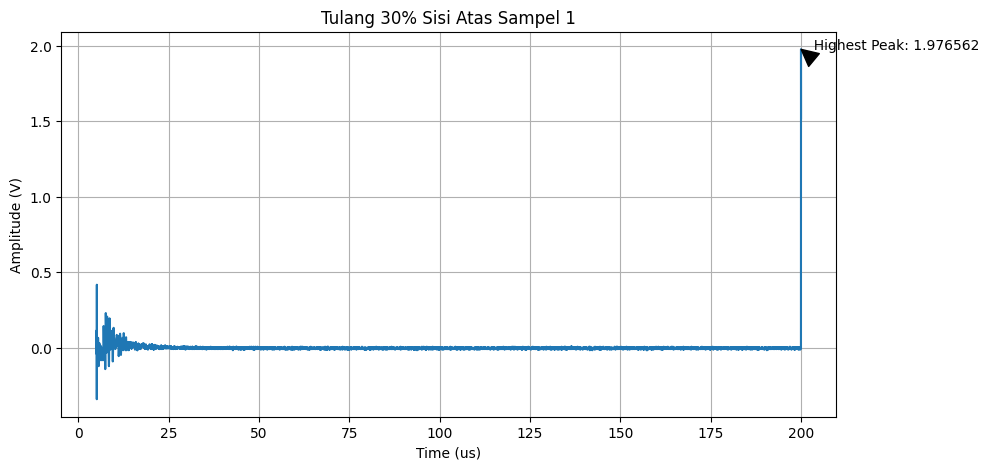

In [43]:
# A301
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y1)  # mencari puncak-puncak dalam sinyal
highest_peak1 = peaks[y1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, y1)
plt.annotate(f'  Highest Peak: {y1[highest_peak1]:.6f}', 
             xy=(x1[highest_peak1], 
                 y1[highest_peak1]),
             xytext=(x1[highest_peak1]+1, y1[highest_peak1]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Atas Sampel 1')

Text(0.5, 1.0, 'Tulang 30% Sisi Atas Sampel 2')

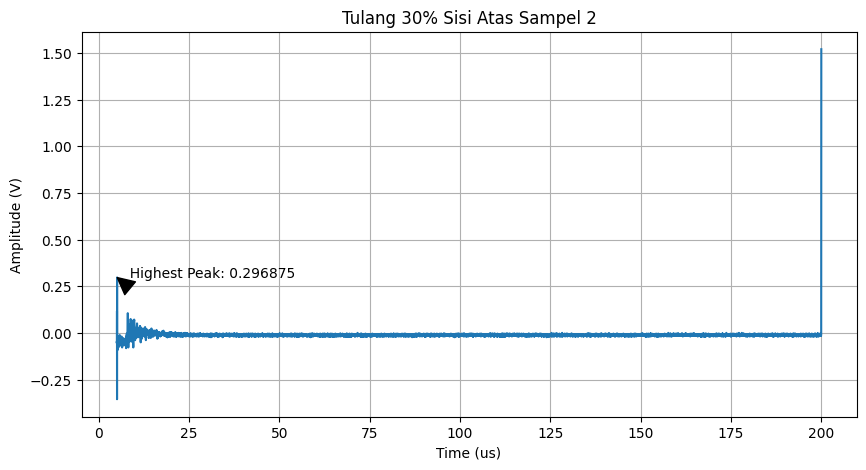

In [35]:
# A302
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y2)  # mencari puncak-puncak dalam sinyal
highest_peak2 = peaks[y2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, y2)
plt.annotate(f'  Highest Peak: {y2[highest_peak2]:.6f}', 
             xy=(x2[highest_peak2], 
                 y2[highest_peak2]),
             xytext=(x2[highest_peak2]+1, y2[highest_peak2]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Atas Sampel 2')

Text(0.5, 1.0, 'Tulang 30% Sisi Atas Sampel 3')

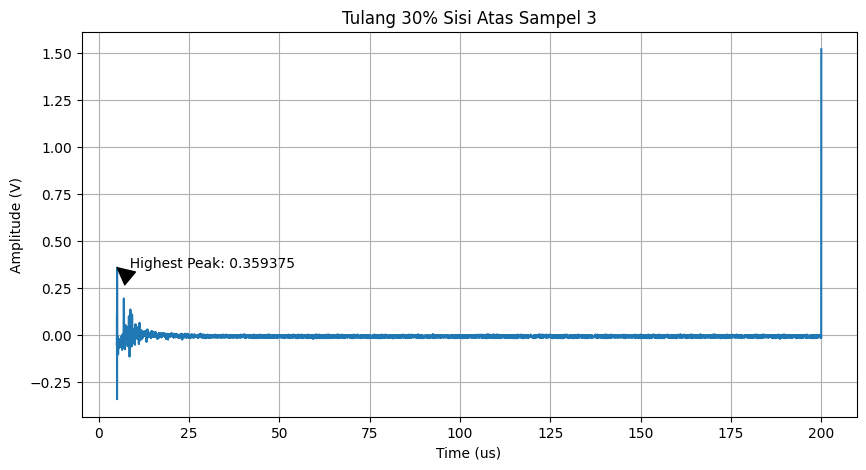

In [38]:
# A303
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y3)  # mencari puncak-puncak dalam sinyal
highest_peak3 = peaks[y3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, y3)
plt.annotate(f'  Highest Peak: {y3[highest_peak3]:.6f}', 
             xy=(x3[highest_peak3], 
                 y3[highest_peak3]),
             xytext=(x3[highest_peak3]+1, y3[highest_peak3]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Atas Sampel 3')

Text(0.5, 1.0, 'Tulang 30% Sisi Atas Sampel 4')

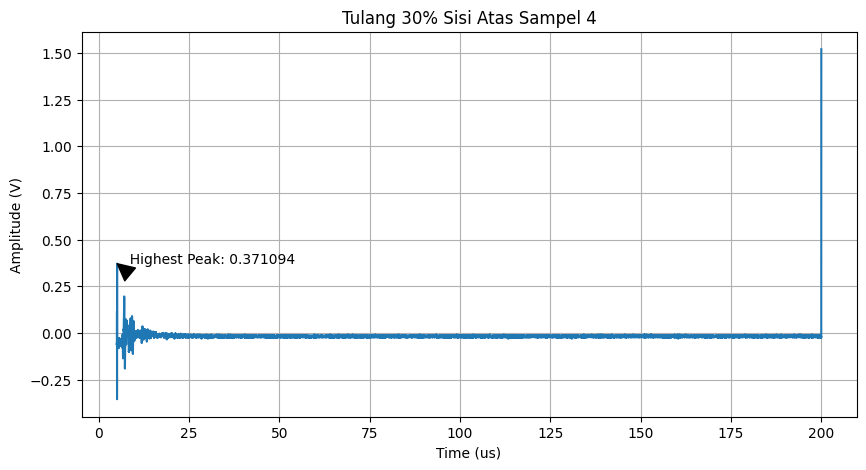

In [39]:
# A304
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y4)  # mencari puncak-puncak dalam sinyal
highest_peak4 = peaks[y4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, y4)
plt.annotate(f'  Highest Peak: {y4[highest_peak4]:.6f}', 
             xy=(x4[highest_peak4], 
                 y4[highest_peak4]),
             xytext=(x4[highest_peak4]+1, y4[highest_peak4]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Atas Sampel 4')

Text(0.5, 1.0, 'Tulang 30% Sisi Atas Sampel 5')

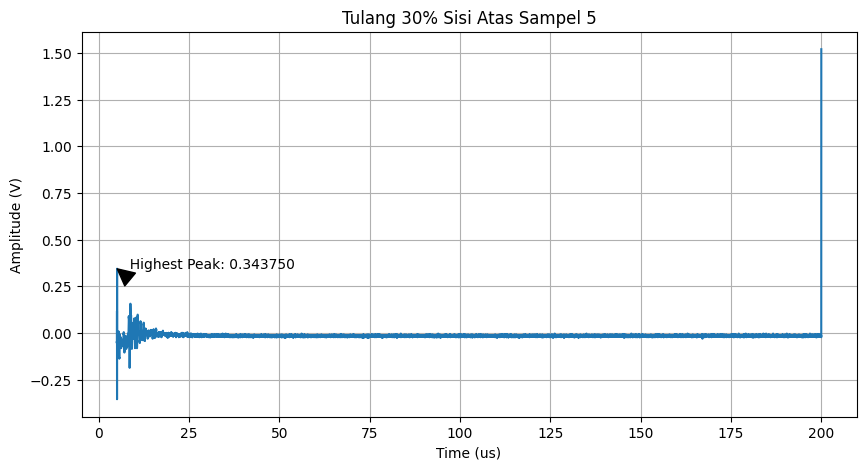

In [44]:
# A305
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y5)  # mencari puncak-puncak dalam sinyal
highest_peak5 = peaks[y5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x5, y5)
plt.annotate(f'  Highest Peak: {y5[highest_peak5]:.6f}', 
             xy=(x5[highest_peak5], 
                 y5[highest_peak5]),
             xytext=(x5[highest_peak5]+1, y5[highest_peak5]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Atas Sampel 5')

## Sisi Samping

Text(0.5, 1.0, 'Tulang 30% Sisi Samping Sampel 1')

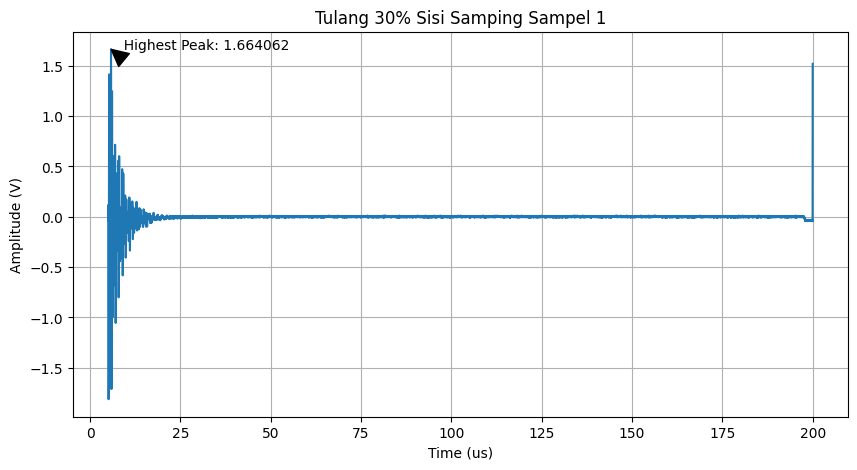

In [46]:
# S301
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y6)  # mencari puncak-puncak dalam sinyal
highest_peak6 = peaks[y6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x6, y6)
plt.annotate(f'  Highest Peak: {y6[highest_peak6]:.6f}', 
             xy=(x6[highest_peak6], 
                 y6[highest_peak6]),
             xytext=(x6[highest_peak6]+1, y6[highest_peak6]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Samping Sampel 1')

Text(0.5, 1.0, 'Tulang 30% Sisi Samping Sampel 2')

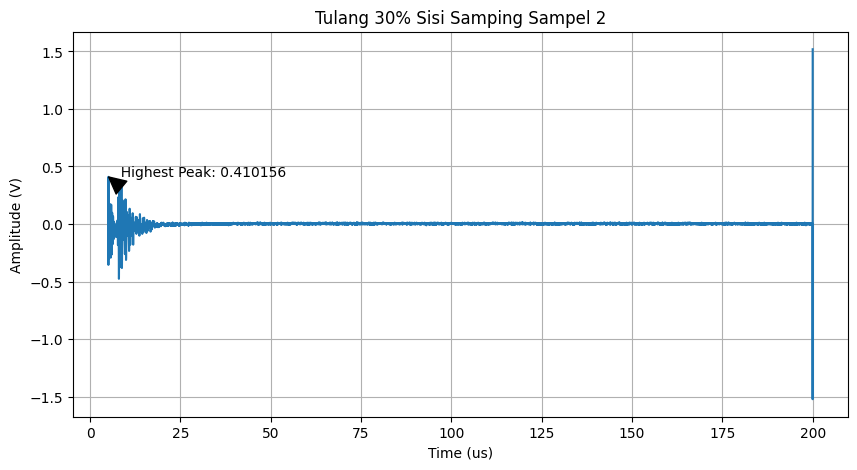

In [47]:
# S302
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y7)  # mencari puncak-puncak dalam sinyal
highest_peak7 = peaks[y7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x7, y7)
plt.annotate(f'  Highest Peak: {y7[highest_peak7]:.6f}', 
             xy=(x7[highest_peak7], 
                 y7[highest_peak7]),
             xytext=(x7[highest_peak7]+1, y7[highest_peak7]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Samping Sampel 2')

Text(0.5, 1.0, 'Tulang 30% Sisi Samping Sampel 3')

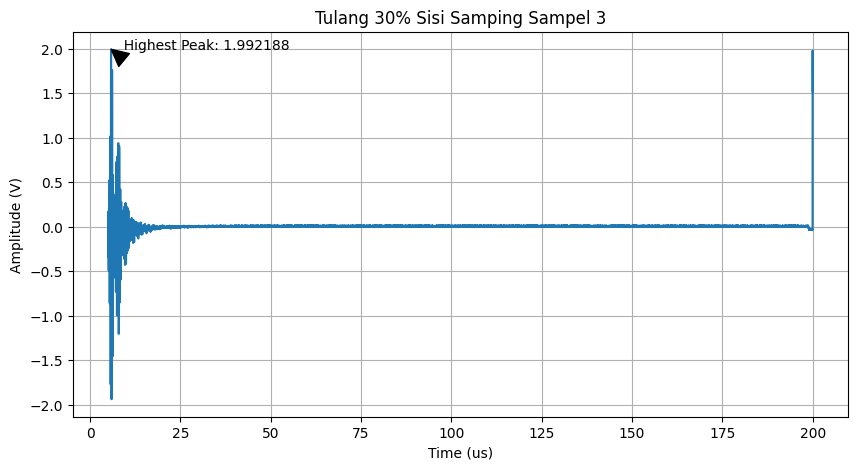

In [48]:
# S303
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y8)  # mencari puncak-puncak dalam sinyal
highest_peak8 = peaks[y8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x8, y8)
plt.annotate(f'  Highest Peak: {y8[highest_peak8]:.6f}', 
             xy=(x8[highest_peak8], 
                 y8[highest_peak8]),
             xytext=(x8[highest_peak8]+1, y8[highest_peak8]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Samping Sampel 3')

Text(0.5, 1.0, 'Tulang 30% Sisi Samping Sampel 4')

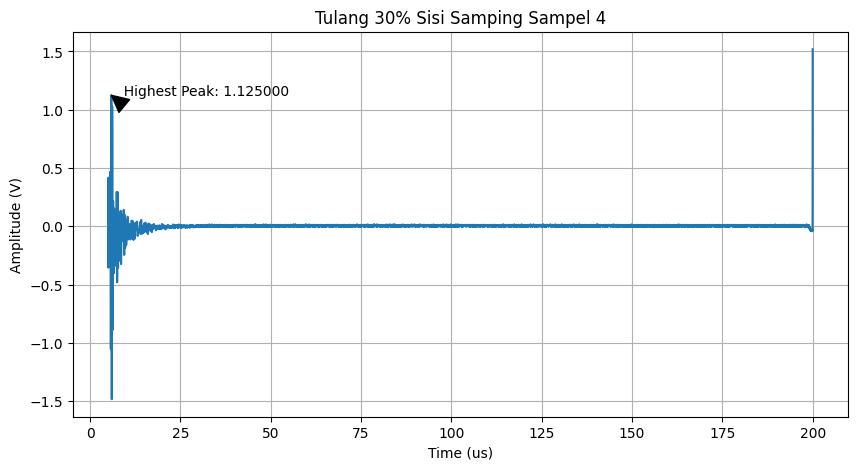

In [49]:
# S304
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y9)  # mencari puncak-puncak dalam sinyal
highest_peak9 = peaks[y9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x9, y9)
plt.annotate(f'  Highest Peak: {y9[highest_peak9]:.6f}', 
             xy=(x9[highest_peak9], 
                 y9[highest_peak9]),
             xytext=(x9[highest_peak9]+1, y9[highest_peak9]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Samping Sampel 4')

Text(0.5, 1.0, 'Tulang 30% Sisi Samping Sampel 5')

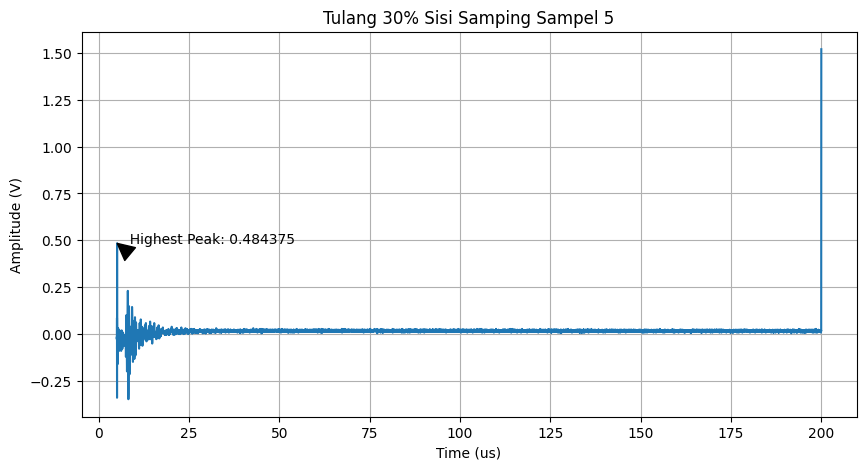

In [50]:
# S305
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y10)  # mencari puncak-puncak dalam sinyal
highest_peak9 = peaks[y10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x10, y10)
plt.annotate(f'  Highest Peak: {y10[highest_peak9]:.6f}', 
             xy=(x10[highest_peak9], 
                 y10[highest_peak9]),
             xytext=(x10[highest_peak9]+1, y10[highest_peak9]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Samping Sampel 5')

## Sisi Kecil

Text(0.5, 1.0, 'Tulang 30% Sisi Kecil Sampel 1')

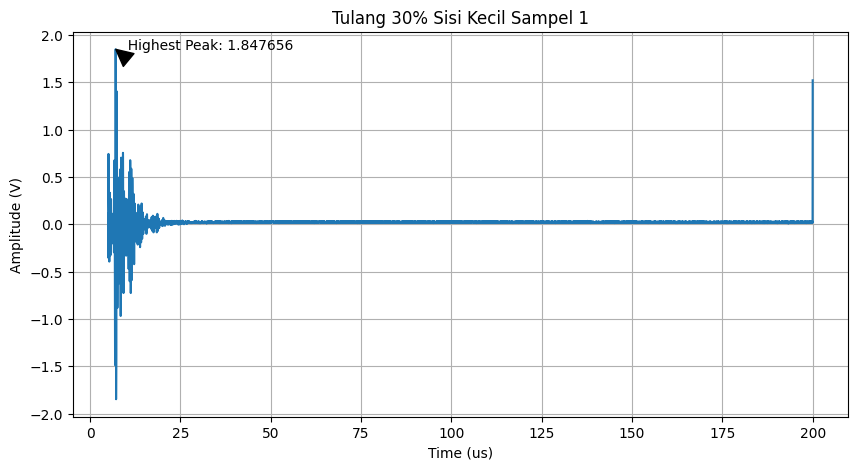

In [57]:
# K301
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y11)  # mencari puncak-puncak dalam sinyal
highest_peak11 = peaks[y11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x11, y11)
plt.annotate(f'  Highest Peak: {y11[highest_peak11]:.6f}', 
             xy=(x11[highest_peak11], 
                 y11[highest_peak11]),
             xytext=(x11[highest_peak11]+1, y11[highest_peak11]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Kecil Sampel 1')

Text(0.5, 1.0, 'Tulang 30% Sisi Kecil Sampel 2')

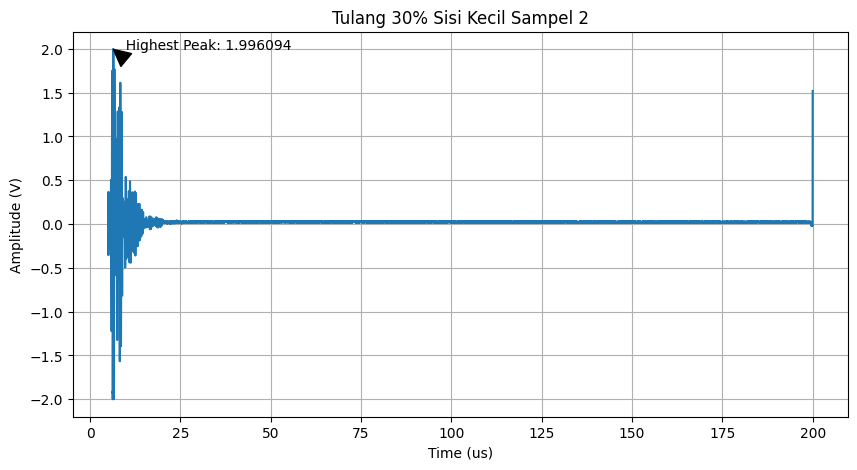

In [58]:
# K302
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(y12)  # mencari puncak-puncak dalam sinyal
highest_peak12 = peaks[y12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x12, y12)
plt.annotate(f'  Highest Peak: {y12[highest_peak12]:.6f}', 
             xy=(x12[highest_peak12], 
                 y12[highest_peak12]),
             xytext=(x12[highest_peak12]+1, y12[highest_peak12]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang 30% Sisi Kecil Sampel 2')

# Parameter Filter, Apply Bandpass, Rectify Signal

In [59]:
# Define the filter parameters
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

## Apply a bandpass filter to the signal

In [61]:
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')

filtered_signal1 = signal.filtfilt(b, a, y1)
filtered_signal2 = signal.filtfilt(b, a, y2)
filtered_signal3 = signal.filtfilt(b, a, y3)
filtered_signal4 = signal.filtfilt(b, a, y4)
filtered_signal5 = signal.filtfilt(b, a, y5)
filtered_signal6 = signal.filtfilt(b, a, y6)
filtered_signal7 = signal.filtfilt(b, a, y7)
filtered_signal8 = signal.filtfilt(b, a, y8)
filtered_signal9 = signal.filtfilt(b, a, y9)
filtered_signal10 = signal.filtfilt(b, a, y10)
filtered_signal11 = signal.filtfilt(b, a, y11)
filtered_signal12 = signal.filtfilt(b, a, y12)

## Rectify the Signal

In [62]:
rectified_signal1 = np.abs(filtered_signal1)
rectified_signal2 = np.abs(filtered_signal2)
rectified_signal3 = np.abs(filtered_signal3)
rectified_signal4 = np.abs(filtered_signal4)
rectified_signal5 = np.abs(filtered_signal5)
rectified_signal6 = np.abs(filtered_signal6)
rectified_signal7 = np.abs(filtered_signal7)
rectified_signal8 = np.abs(filtered_signal8)
rectified_signal9 = np.abs(filtered_signal9)
rectified_signal10 = np.abs(filtered_signal10)
rectified_signal11 = np.abs(filtered_signal11)
rectified_signal12 = np.abs(filtered_signal12)

## Perform Fourier Transform

In [63]:
# Perform Fourier transform
signal_fft1 = np.fft.fft(filtered_signal1)
signal_freq1 = np.fft.fftfreq(len(filtered_signal1), 1/fs)

signal_fft2 = np.fft.fft(filtered_signal2)
signal_freq2 = np.fft.fftfreq(len(filtered_signal2), 1/fs)

signal_fft3 = np.fft.fft(filtered_signal3)
signal_freq3 = np.fft.fftfreq(len(filtered_signal3), 1/fs)

signal_fft4 = np.fft.fft(filtered_signal4)
signal_freq4 = np.fft.fftfreq(len(filtered_signal4), 1/fs)

signal_fft5 = np.fft.fft(filtered_signal5)
signal_freq5 = np.fft.fftfreq(len(filtered_signal5), 1/fs)

signal_fft6 = np.fft.fft(filtered_signal6)
signal_freq6 = np.fft.fftfreq(len(filtered_signal6), 1/fs)

signal_fft7 = np.fft.fft(filtered_signal7)
signal_freq7 = np.fft.fftfreq(len(filtered_signal7), 1/fs)

signal_fft8 = np.fft.fft(filtered_signal8)
signal_freq8 = np.fft.fftfreq(len(filtered_signal8), 1/fs)

signal_fft9 = np.fft.fft(filtered_signal9)
signal_freq9 = np.fft.fftfreq(len(filtered_signal9), 1/fs)

signal_fft10 = np.fft.fft(filtered_signal10)
signal_freq10 = np.fft.fftfreq(len(filtered_signal10), 1/fs)

signal_fft11 = np.fft.fft(filtered_signal11)
signal_freq11 = np.fft.fftfreq(len(filtered_signal11), 1/fs)

signal_fft12 = np.fft.fft(filtered_signal12)
signal_freq12 = np.fft.fftfreq(len(filtered_signal12), 1/fs)

## One-Sided FFT and Discard Negative Frequencies

In [64]:
# Atas
n = len(filtered_signal1)
freq1 = signal_freq1[0:int(n/2)]
fft_amp1 = np.abs(signal_fft1)[0:int(n/2)]/n*2

n = len(filtered_signal2)
freq2 = signal_freq2[0:int(n/2)]
fft_amp2 = np.abs(signal_fft2)[0:int(n/2)]/n*2

n = len(filtered_signal3)
freq3 = signal_freq3[0:int(n/2)]
fft_amp3 = np.abs(signal_fft3)[0:int(n/2)]/n*2

n = len(filtered_signal4)
freq4 = signal_freq4[0:int(n/2)]
fft_amp4 = np.abs(signal_fft4)[0:int(n/2)]/n*2

n = len(filtered_signal5)
freq5 = signal_freq5[0:int(n/2)]
fft_amp5 = np.abs(signal_fft5)[0:int(n/2)]/n*2

# Samping
n = len(filtered_signal6)
freq6 = signal_freq6[0:int(n/2)]
fft_amp6 = np.abs(signal_fft6)[0:int(n/2)]/n*2

n = len(filtered_signal7)
freq7 = signal_freq7[0:int(n/2)]
fft_amp7 = np.abs(signal_fft7)[0:int(n/2)]/n*2

n = len(filtered_signal8)
freq8 = signal_freq8[0:int(n/2)]
fft_amp8 = np.abs(signal_fft8)[0:int(n/2)]/n*2

n = len(filtered_signal9)
freq9 = signal_freq9[0:int(n/2)]
fft_amp9 = np.abs(signal_fft9)[0:int(n/2)]/n*2

n = len(filtered_signal10)
freq10 = signal_freq10[0:int(n/2)]
fft_amp10 = np.abs(signal_fft10)[0:int(n/2)]/n*2

# Kecil
n = len(filtered_signal11)
freq11 = signal_freq11[0:int(n/2)]
fft_amp11 = np.abs(signal_fft11)[0:int(n/2)]/n*2

n = len(filtered_signal12)
freq12 = signal_freq12[0:int(n/2)]
fft_amp12 = np.abs(signal_fft12)[0:int(n/2)]/n*2

## PSD Calculation

In [65]:
# Perform power spectral density (PSD) calculation
psd1 = (1/(fs*n)) * np.square(np.abs(signal_fft1[:n//2]))
psd2 = (1/(fs*n)) * np.square(np.abs(signal_fft2[:n//2]))
psd3 = (1/(fs*n)) * np.square(np.abs(signal_fft3[:n//2]))
psd4 = (1/(fs*n)) * np.square(np.abs(signal_fft4[:n//2]))
psd5 = (1/(fs*n)) * np.square(np.abs(signal_fft5[:n//2]))
psd6 = (1/(fs*n)) * np.square(np.abs(signal_fft6[:n//2]))
psd7 = (1/(fs*n)) * np.square(np.abs(signal_fft7[:n//2]))
psd8 = (1/(fs*n)) * np.square(np.abs(signal_fft8[:n//2]))
psd9 = (1/(fs*n)) * np.square(np.abs(signal_fft9[:n//2]))
psd10 = (1/(fs*n)) * np.square(np.abs(signal_fft10[:n//2]))
psd11 = (1/(fs*n)) * np.square(np.abs(signal_fft11[:n//2]))
psd12 = (1/(fs*n)) * np.square(np.abs(signal_fft12[:n//2]))

## Perform one-sided PSD (discard negative frequencies)

In [66]:
# Perform one-sided PSD (discard negative frequencies)
freq_psd1 = signal_freq1[0:int(n/2)]
psd_one_sided1 = psd1[0:int(n/2)]

freq_psd2 = signal_freq2[0:int(n/2)]
psd_one_sided2 = psd2[0:int(n/2)]

freq_psd3 = signal_freq3[0:int(n/2)]
psd_one_sided3 = psd2[0:int(n/2)]

freq_psd4 = signal_freq4[0:int(n/2)]
psd_one_sided4 = psd4[0:int(n/2)]

freq_psd5 = signal_freq5[0:int(n/2)]
psd_one_sided5 = psd5[0:int(n/2)]

freq_psd6 = signal_freq6[0:int(n/2)]
psd_one_sided6 = psd6[0:int(n/2)]

freq_psd7 = signal_freq7[0:int(n/2)]
psd_one_sided7 = psd7[0:int(n/2)]

freq_psd8 = signal_freq8[0:int(n/2)]
psd_one_sided8 = psd8[0:int(n/2)]

freq_psd9 = signal_freq9[0:int(n/2)]
psd_one_sided9 = psd9[0:int(n/2)]

freq_psd10 = signal_freq10[0:int(n/2)]
psd_one_sided10 = psd10[0:int(n/2)]

freq_psd11 = signal_freq11[0:int(n/2)]
psd_one_sided11 = psd11[0:int(n/2)]

freq_psd12 = signal_freq12[0:int(n/2)]
psd_one_sided12 = psd12[0:int(n/2)]

# Plot hasil pengolahan

## Sisi Atas

### A301

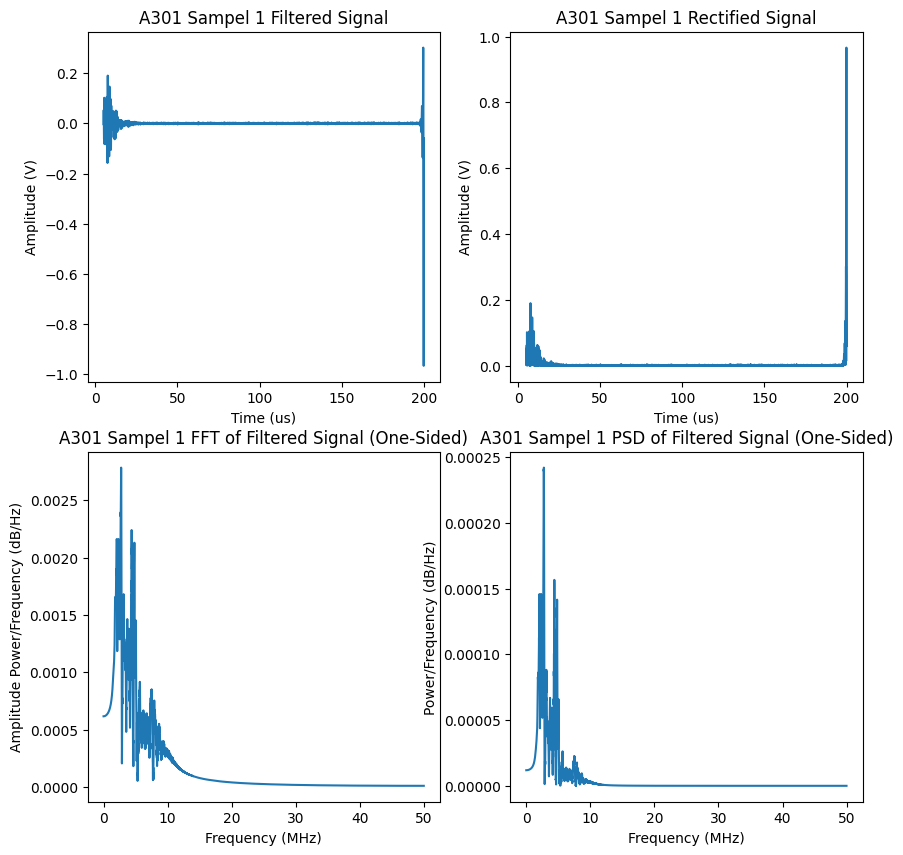

In [69]:
# A301
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x1, filtered_signal1)
axs[0, 0].set_title('A301 Sampel 1 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x1, rectified_signal1)
axs[0, 1].set_title('A301 Sampel 1 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq1, fft_amp1)
axs[1, 0].set_title('A301 Sampel 1 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd1, psd_one_sided1)
axs[1, 1].set_title('A301 Sampel 1 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

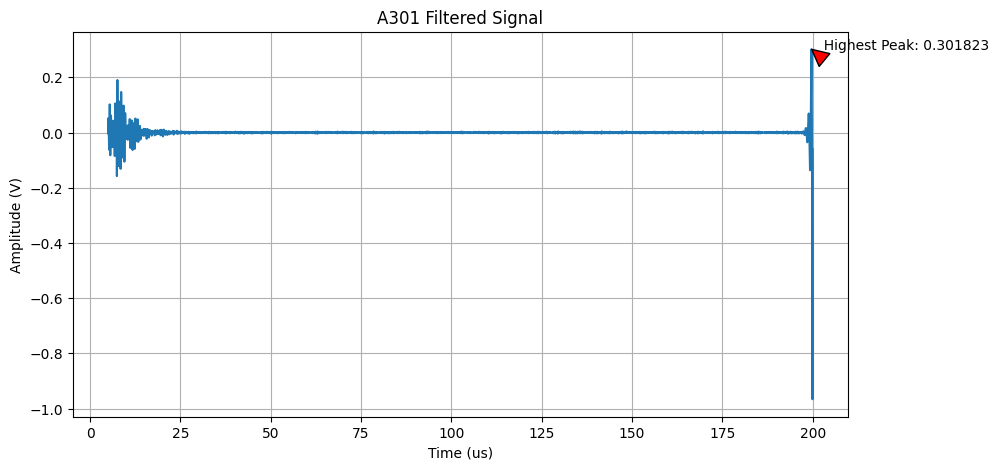

In [75]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, filtered_signal1)
plt.annotate(f'  Highest Peak: {filtered_signal1[highest_peak]:.6f}', 
             xy=(x1[highest_peak1], 
                 filtered_signal1[highest_peak]),
             xytext=(x1[highest_peak]+1, filtered_signal1[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A301 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

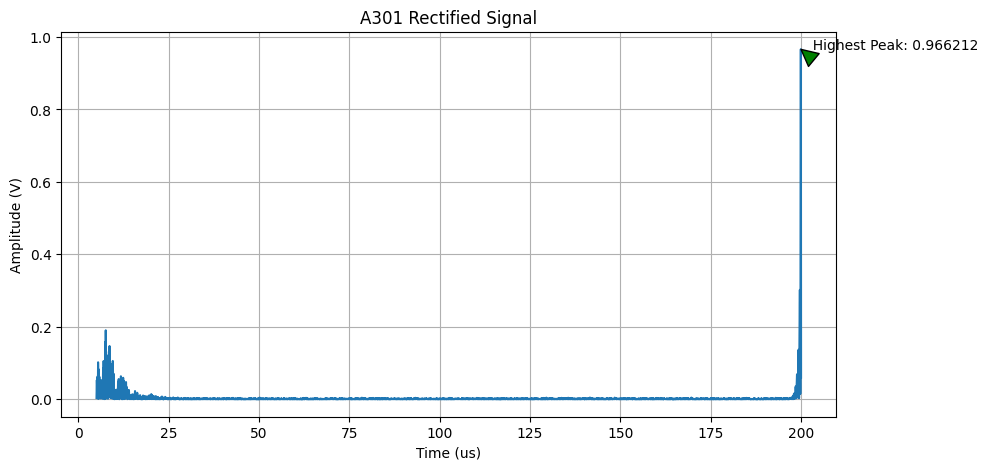

In [76]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x1, rectified_signal1)
plt.annotate(f'  Highest Peak: {rectified_signal1[highest_peak]:.6f}', 
             xy=(x1[highest_peak], 
                 rectified_signal1[highest_peak]),
             xytext=(x1[highest_peak]+1, rectified_signal1[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A301 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

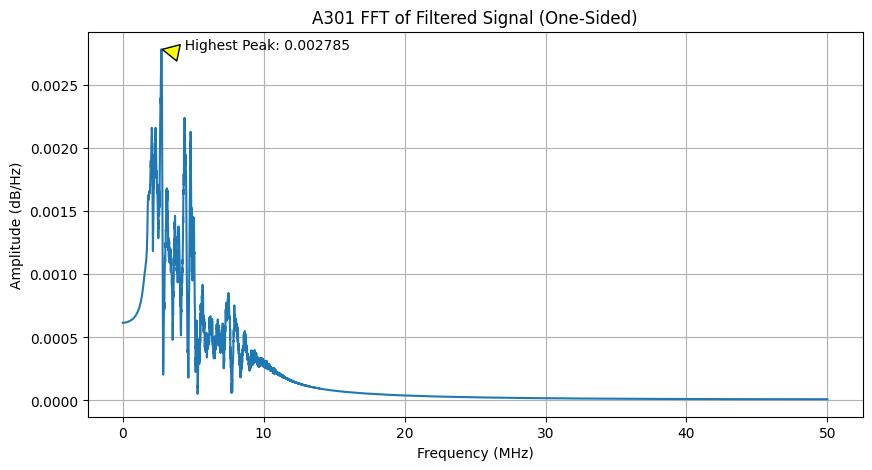

In [78]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq1, fft_amp1)
plt.annotate(f'  Highest Peak: {fft_amp1[highest_peak]:.6f}', 
             xy=(freq1[highest_peak], 
                 fft_amp1[highest_peak]),
             xytext=(freq1[highest_peak]+1, fft_amp1[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A301 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

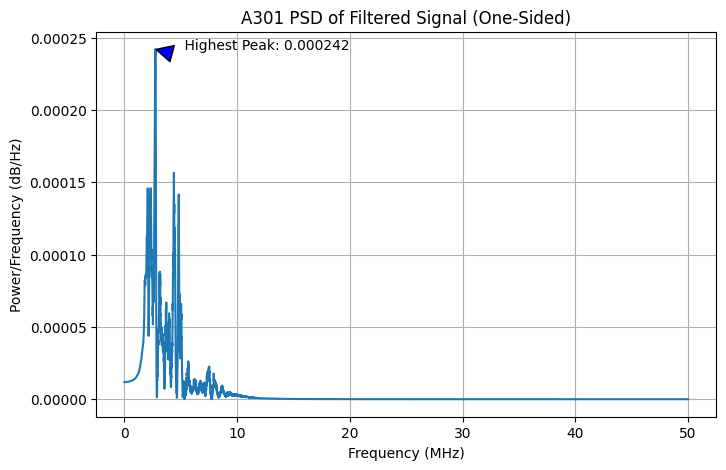

In [80]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd1, psd_one_sided1)
plt.annotate(f'    Highest Peak: {psd_one_sided1[highest_peak]:.6f}', 
             xy=(freq_psd1[highest_peak], 
                 psd_one_sided1[highest_peak]),
             xytext=(freq_psd1[highest_peak]+1, psd_one_sided1[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A301 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### A302

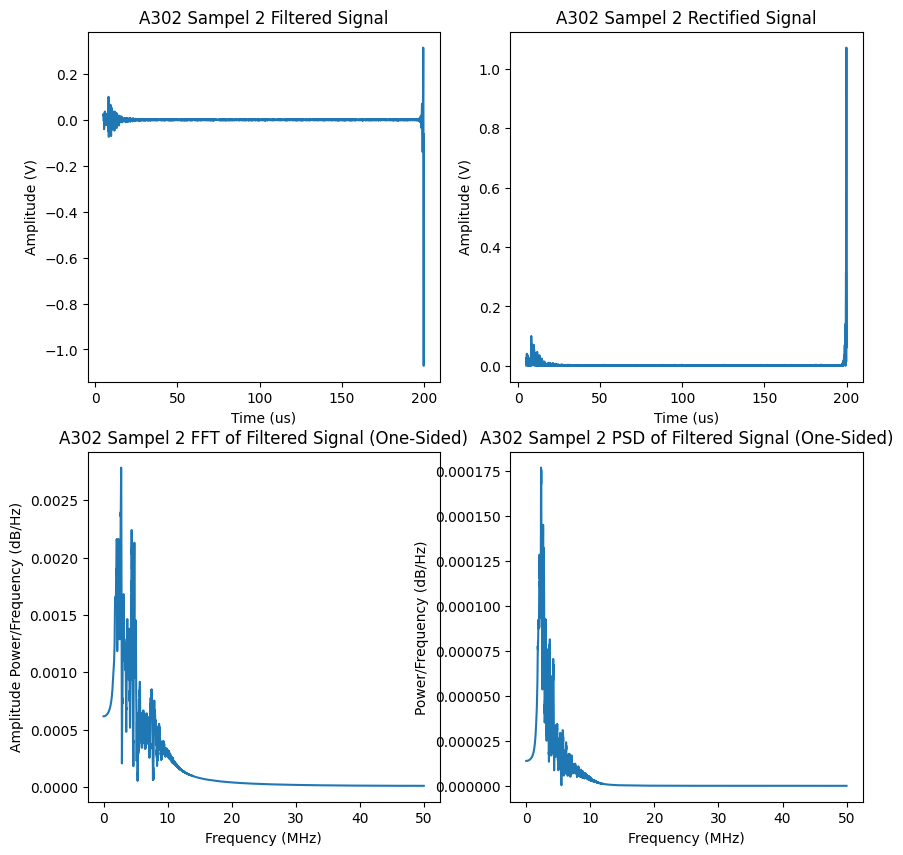

In [83]:
# A302
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x2, filtered_signal2)
axs[0, 0].set_title('A302 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x2, rectified_signal2)
axs[0, 1].set_title('A302 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq2, fft_amp1)
axs[1, 0].set_title('A302 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd2, psd_one_sided2)
axs[1, 1].set_title('A302 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

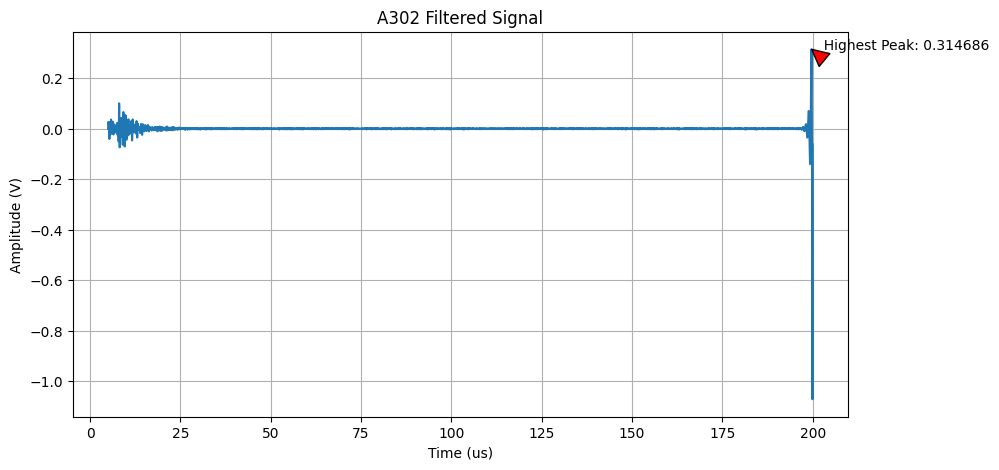

In [84]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, filtered_signal2)
plt.annotate(f'  Highest Peak: {filtered_signal2[highest_peak]:.6f}', 
             xy=(x2[highest_peak1], 
                 filtered_signal2[highest_peak]),
             xytext=(x2[highest_peak]+1, filtered_signal2[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A302 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

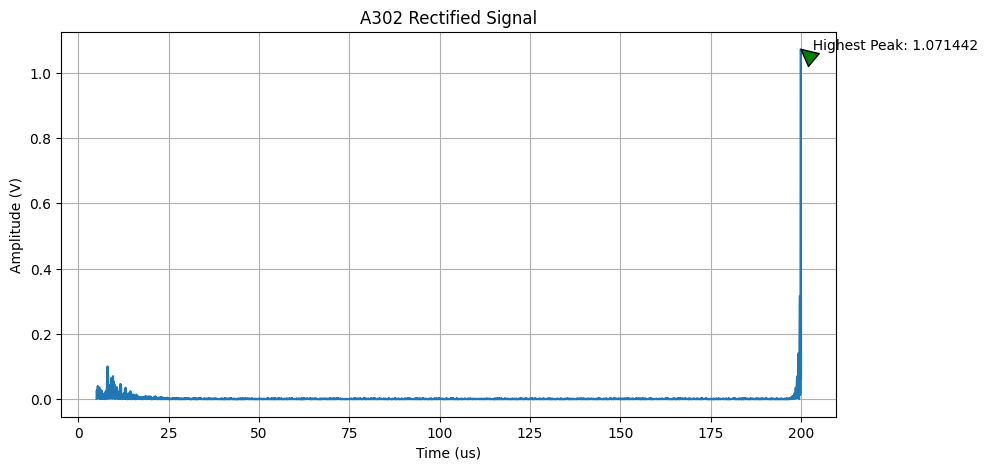

In [85]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x2, rectified_signal2)
plt.annotate(f'  Highest Peak: {rectified_signal2[highest_peak]:.6f}', 
             xy=(x2[highest_peak], 
                 rectified_signal2[highest_peak]),
             xytext=(x2[highest_peak]+1, rectified_signal2[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A302 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

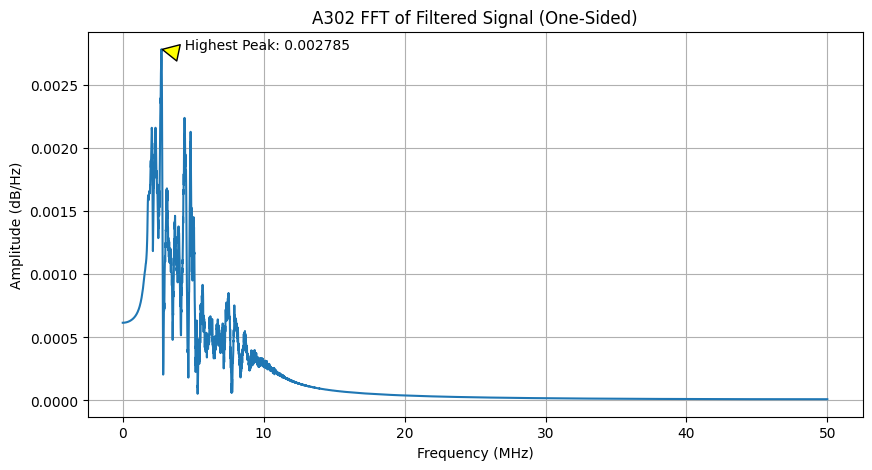

In [87]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp1)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp1[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq2, fft_amp1)
plt.annotate(f'  Highest Peak: {fft_amp1[highest_peak]:.6f}', 
             xy=(freq2[highest_peak], 
                 fft_amp1[highest_peak]),
             xytext=(freq2[highest_peak]+1, fft_amp1[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A302 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

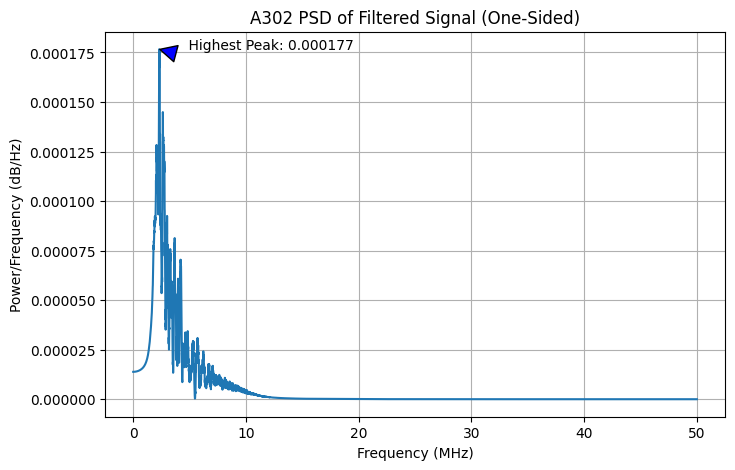

In [88]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided2)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided2[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd2, psd_one_sided2)
plt.annotate(f'    Highest Peak: {psd_one_sided2[highest_peak]:.6f}', 
             xy=(freq_psd2[highest_peak], 
                 psd_one_sided2[highest_peak]),
             xytext=(freq_psd2[highest_peak]+1, psd_one_sided2[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A302 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### A303

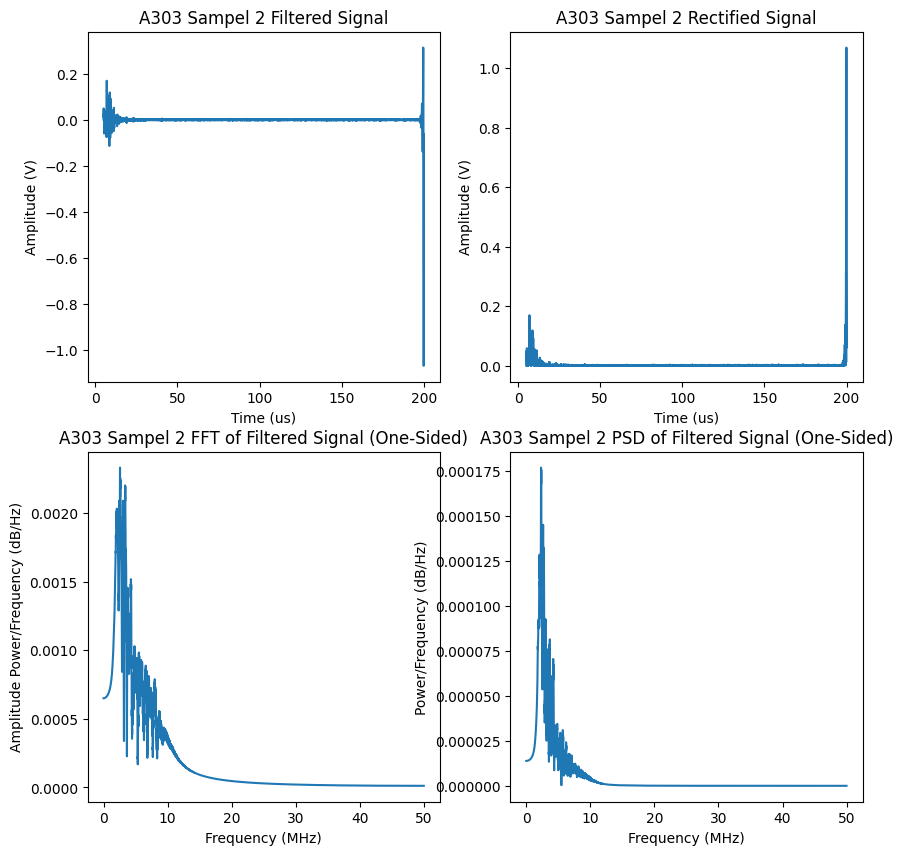

In [89]:
# A303
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x3, filtered_signal3)
axs[0, 0].set_title('A303 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x3, rectified_signal3)
axs[0, 1].set_title('A303 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq3, fft_amp3)
axs[1, 0].set_title('A303 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd3, psd_one_sided3)
axs[1, 1].set_title('A303 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

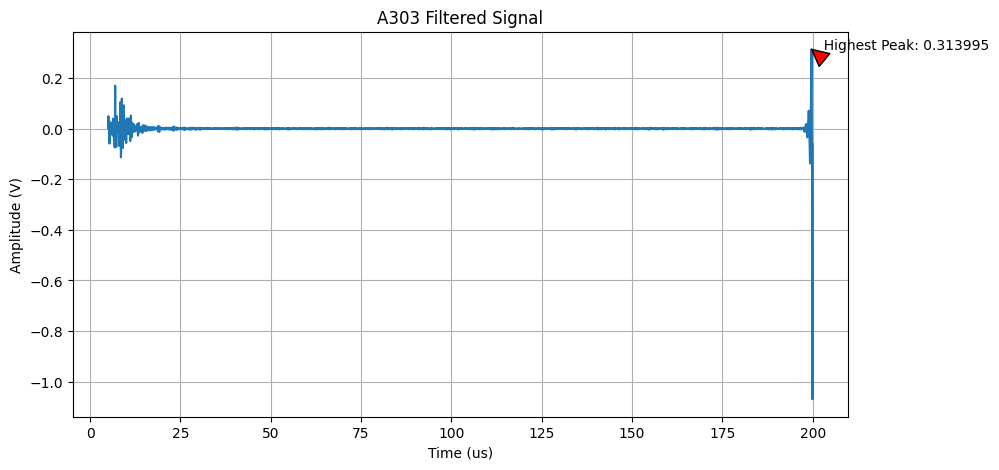

In [90]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, filtered_signal3)
plt.annotate(f'  Highest Peak: {filtered_signal3[highest_peak]:.6f}', 
             xy=(x3[highest_peak1], 
                 filtered_signal3[highest_peak]),
             xytext=(x3[highest_peak]+1, filtered_signal3[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A303 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

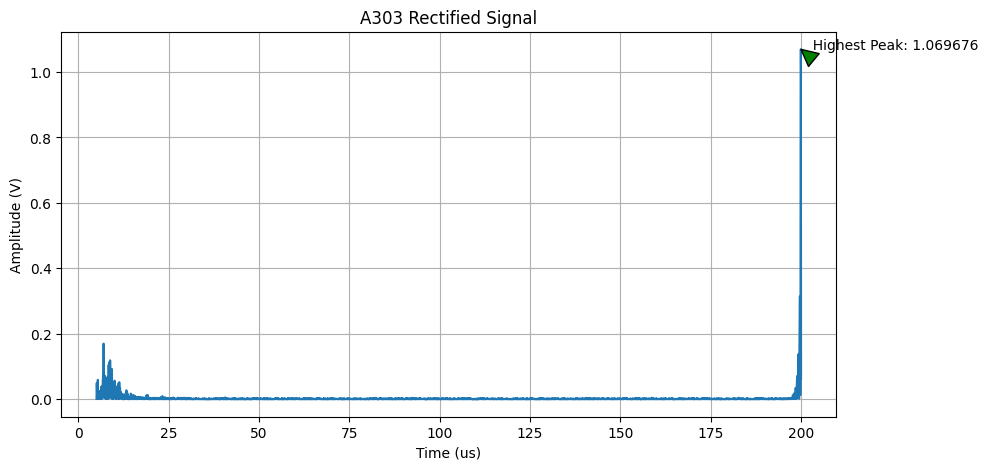

In [91]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x3, rectified_signal3)
plt.annotate(f'  Highest Peak: {rectified_signal3[highest_peak]:.6f}', 
             xy=(x3[highest_peak], 
                 rectified_signal3[highest_peak]),
             xytext=(x3[highest_peak]+1, rectified_signal3[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A303 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

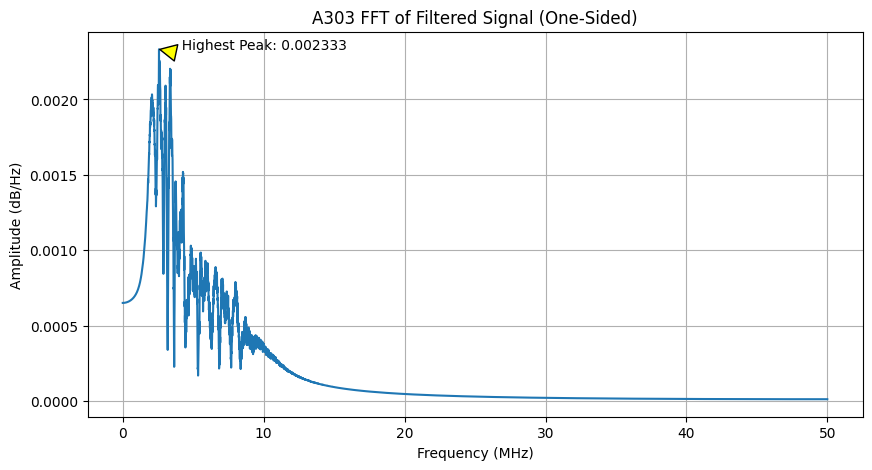

In [92]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq3, fft_amp3)
plt.annotate(f'  Highest Peak: {fft_amp3[highest_peak]:.6f}', 
             xy=(freq3[highest_peak], 
                 fft_amp3[highest_peak]),
             xytext=(freq3[highest_peak]+1, fft_amp3[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A303 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

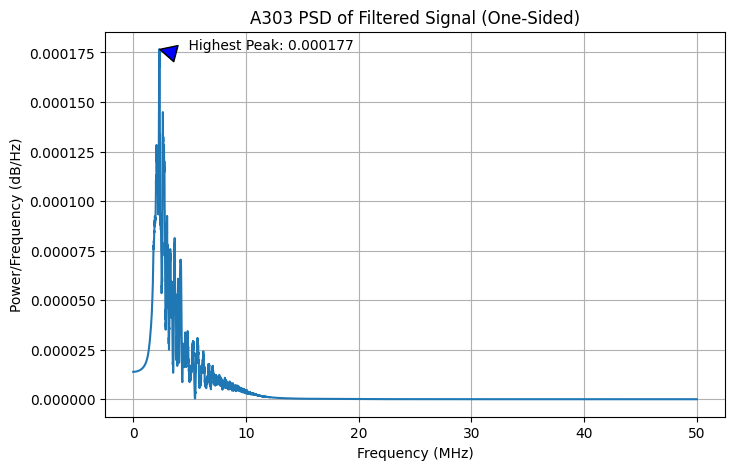

In [93]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided3)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd3, psd_one_sided3)
plt.annotate(f'    Highest Peak: {psd_one_sided3[highest_peak]:.6f}', 
             xy=(freq_psd3[highest_peak], 
                 psd_one_sided3[highest_peak]),
             xytext=(freq_psd3[highest_peak]+1, psd_one_sided3[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A303 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### A304

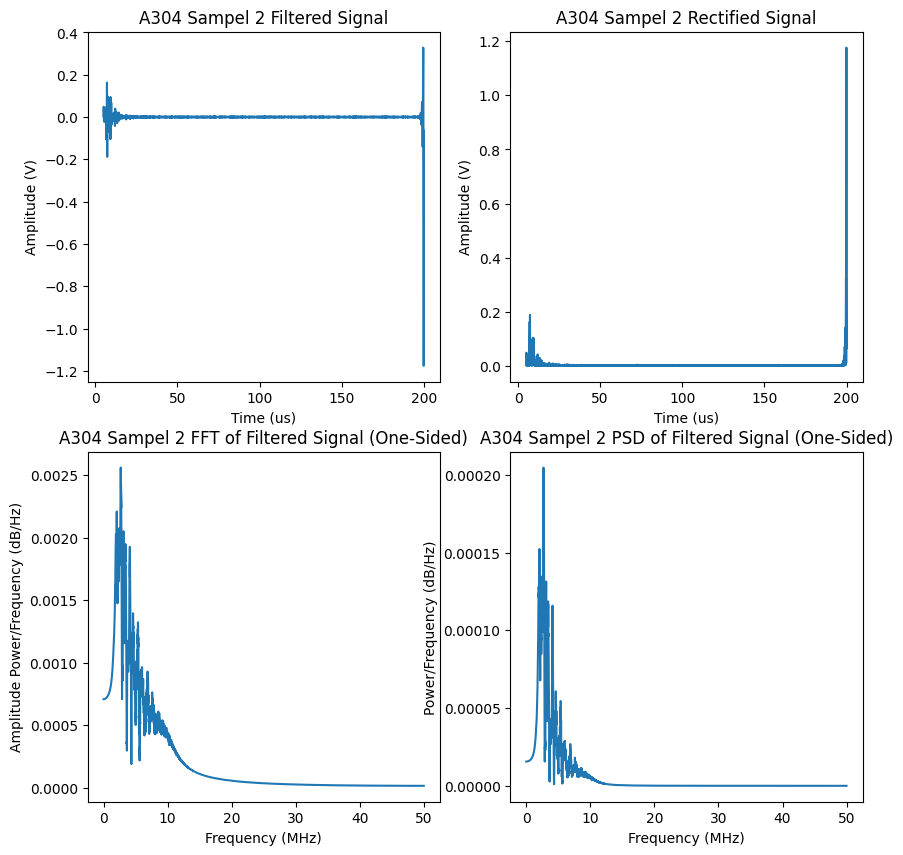

In [99]:
# A304
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x4, filtered_signal4)
axs[0, 0].set_title('A304 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x4, rectified_signal4)
axs[0, 1].set_title('A304 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq4, fft_amp4)
axs[1, 0].set_title('A304 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd4, psd_one_sided4)
axs[1, 1].set_title('A304 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

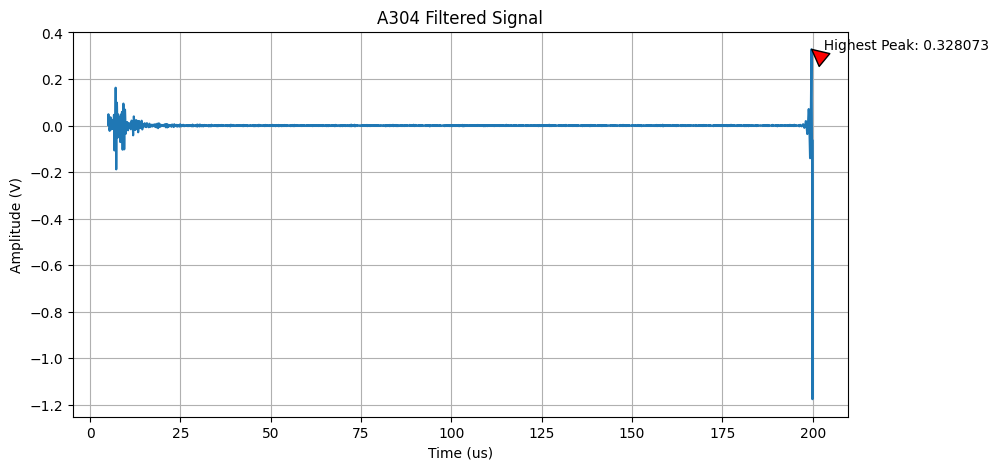

In [100]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, filtered_signal4)
plt.annotate(f'  Highest Peak: {filtered_signal4[highest_peak]:.6f}', 
             xy=(x4[highest_peak1], 
                 filtered_signal4[highest_peak]),
             xytext=(x4[highest_peak]+1, filtered_signal4[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A304 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

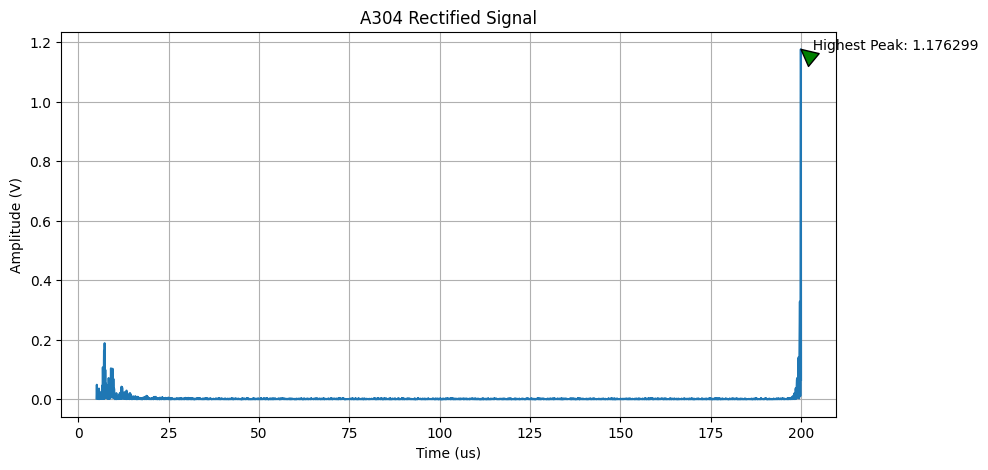

In [101]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x4, rectified_signal4)
plt.annotate(f'  Highest Peak: {rectified_signal4[highest_peak]:.6f}', 
             xy=(x4[highest_peak], 
                 rectified_signal4[highest_peak]),
             xytext=(x4[highest_peak]+1, rectified_signal4[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A304 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

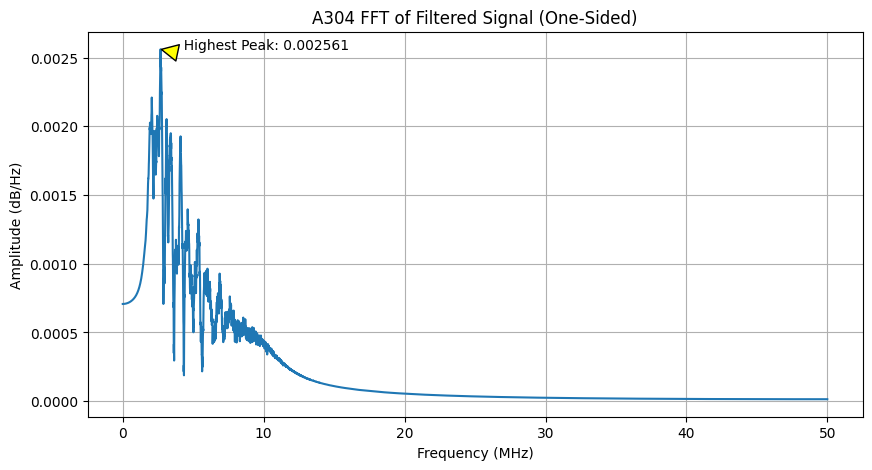

In [102]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq4, fft_amp4)
plt.annotate(f'  Highest Peak: {fft_amp4[highest_peak]:.6f}', 
             xy=(freq4[highest_peak], 
                 fft_amp4[highest_peak]),
             xytext=(freq4[highest_peak]+1, fft_amp4[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A304 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

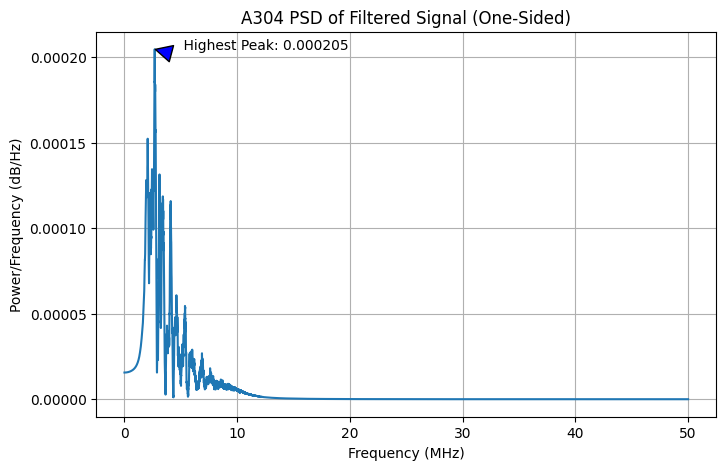

In [103]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided4)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided4[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd4, psd_one_sided4)
plt.annotate(f'    Highest Peak: {psd_one_sided4[highest_peak]:.6f}', 
             xy=(freq_psd4[highest_peak], 
                 psd_one_sided4[highest_peak]),
             xytext=(freq_psd4[highest_peak]+1, psd_one_sided4[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A304 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### A305

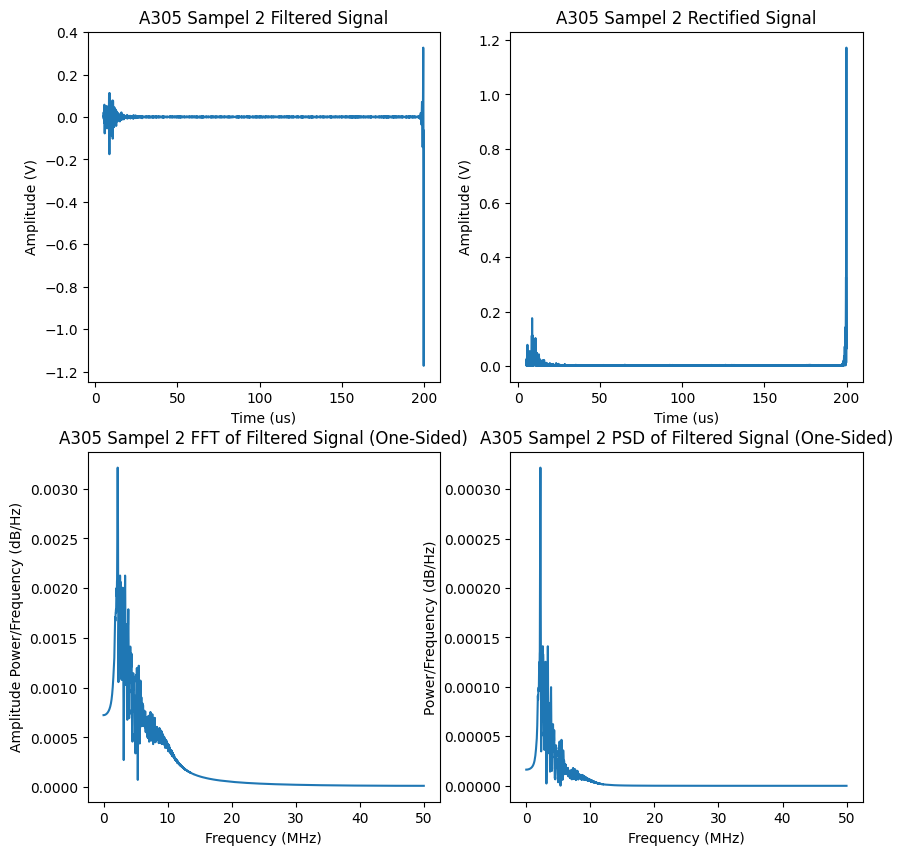

In [104]:
# A305
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x5, filtered_signal5)
axs[0, 0].set_title('A305 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x5, rectified_signal5)
axs[0, 1].set_title('A305 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq5, fft_amp5)
axs[1, 0].set_title('A305 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd5, psd_one_sided5)
axs[1, 1].set_title('A305 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

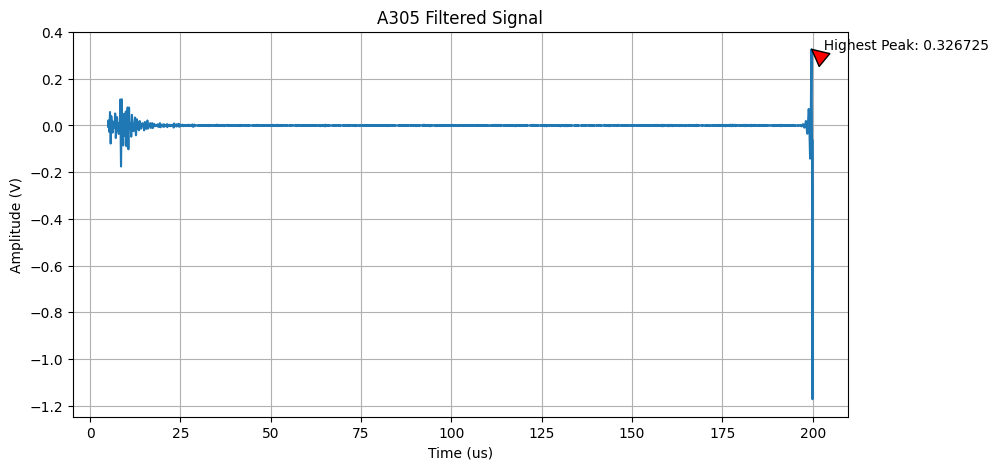

In [105]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x5, filtered_signal5)
plt.annotate(f'  Highest Peak: {filtered_signal5[highest_peak]:.6f}', 
             xy=(x5[highest_peak1], 
                 filtered_signal5[highest_peak]),
             xytext=(x5[highest_peak]+1, filtered_signal5[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('A305 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

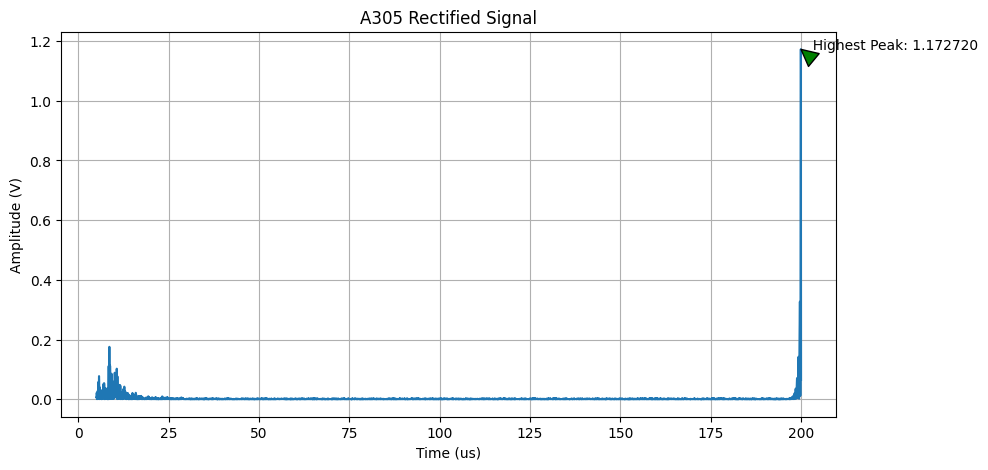

In [106]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x5, rectified_signal5)
plt.annotate(f'  Highest Peak: {rectified_signal5[highest_peak]:.6f}', 
             xy=(x5[highest_peak], 
                 rectified_signal5[highest_peak]),
             xytext=(x5[highest_peak]+1, rectified_signal5[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('A305 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

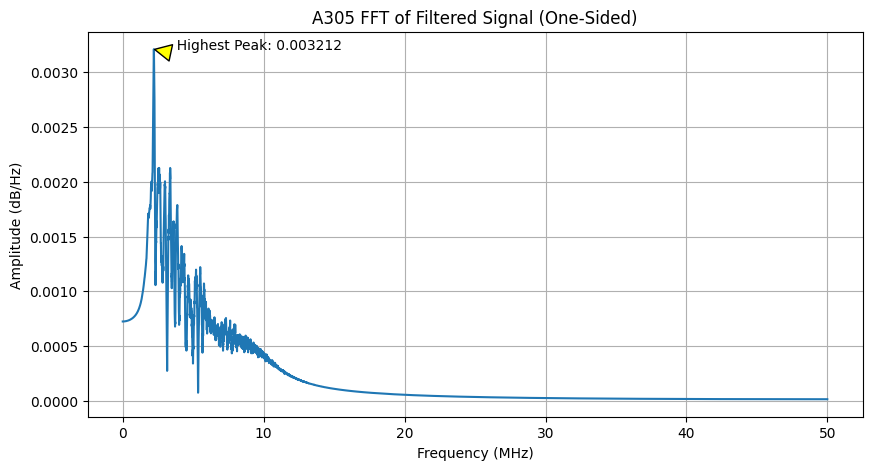

In [109]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq5, fft_amp5)
plt.annotate(f'  Highest Peak: {fft_amp5[highest_peak]:.6f}', 
             xy=(freq5[highest_peak], 
                 fft_amp5[highest_peak]),
             xytext=(freq5[highest_peak]+1, fft_amp5[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('A305 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

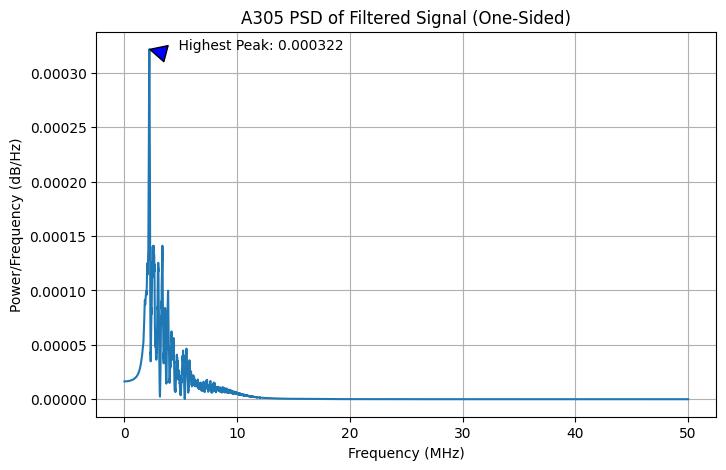

In [108]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided5)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided5[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd5, psd_one_sided5)
plt.annotate(f'    Highest Peak: {psd_one_sided5[highest_peak]:.6f}', 
             xy=(freq_psd5[highest_peak], 
                 psd_one_sided5[highest_peak]),
             xytext=(freq_psd5[highest_peak]+1, psd_one_sided5[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('A305 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

## Sisi Samping

### S301

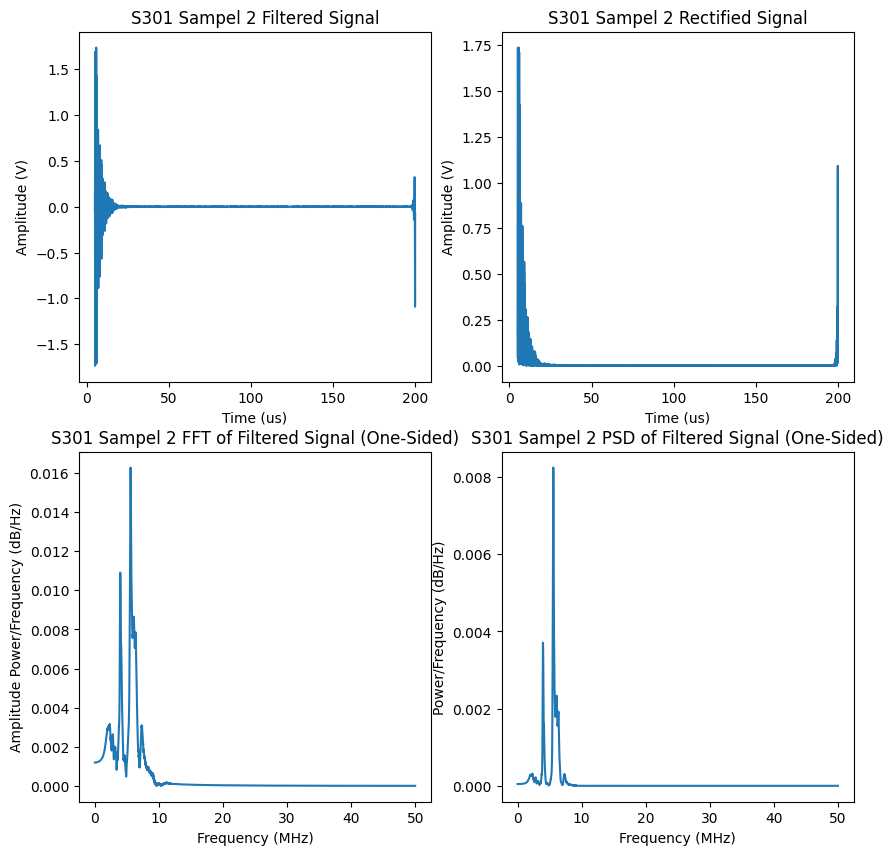

In [110]:
# S301
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x6, filtered_signal6)
axs[0, 0].set_title('S301 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x6, rectified_signal6)
axs[0, 1].set_title('S301 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq6, fft_amp6)
axs[1, 0].set_title('S301 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd6, psd_one_sided6)
axs[1, 1].set_title('S301 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

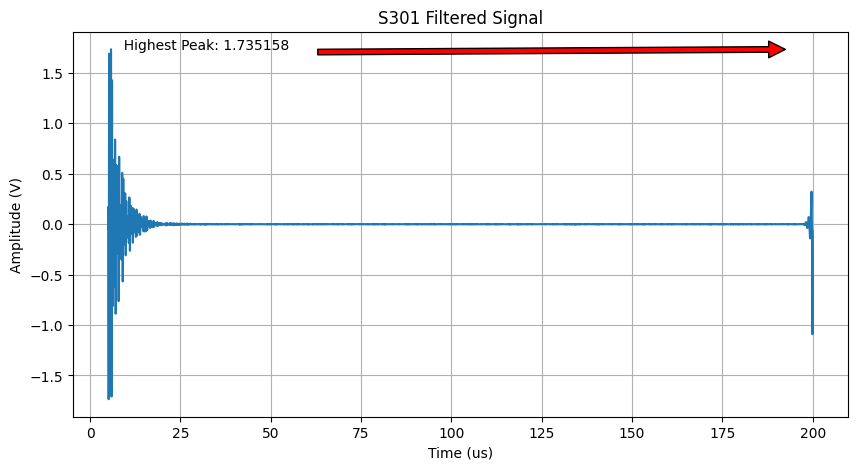

In [111]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x6, filtered_signal6)
plt.annotate(f'  Highest Peak: {filtered_signal6[highest_peak]:.6f}', 
             xy=(x6[highest_peak1], 
                 filtered_signal6[highest_peak]),
             xytext=(x6[highest_peak]+1, filtered_signal6[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S301 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

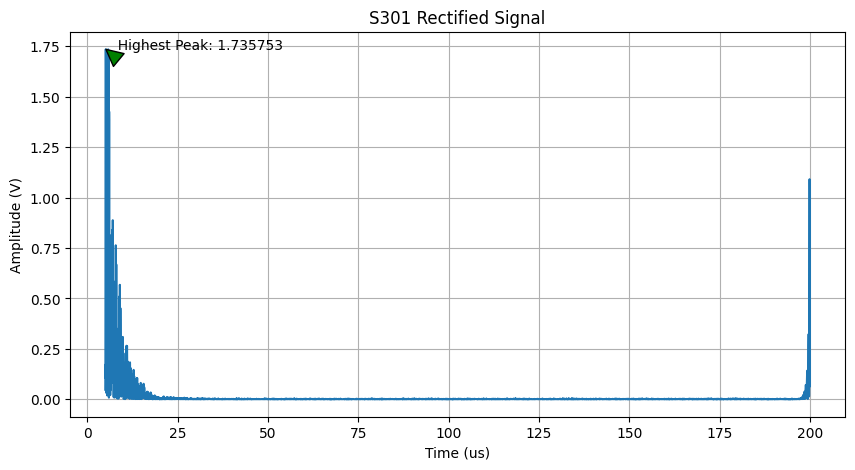

In [112]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x6, rectified_signal6)
plt.annotate(f'  Highest Peak: {rectified_signal6[highest_peak]:.6f}', 
             xy=(x6[highest_peak], 
                 rectified_signal6[highest_peak]),
             xytext=(x6[highest_peak]+1, rectified_signal6[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S301 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

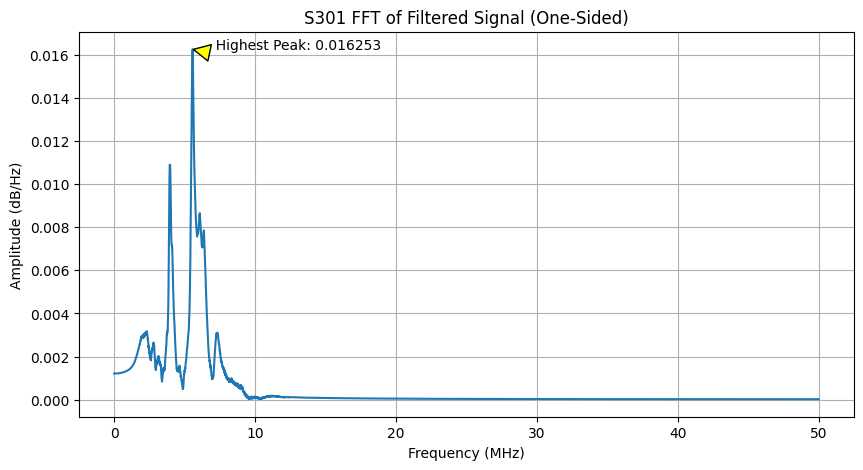

In [113]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq6, fft_amp6)
plt.annotate(f'  Highest Peak: {fft_amp6[highest_peak]:.6f}', 
             xy=(freq6[highest_peak], 
                 fft_amp6[highest_peak]),
             xytext=(freq6[highest_peak]+1, fft_amp6[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S301 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

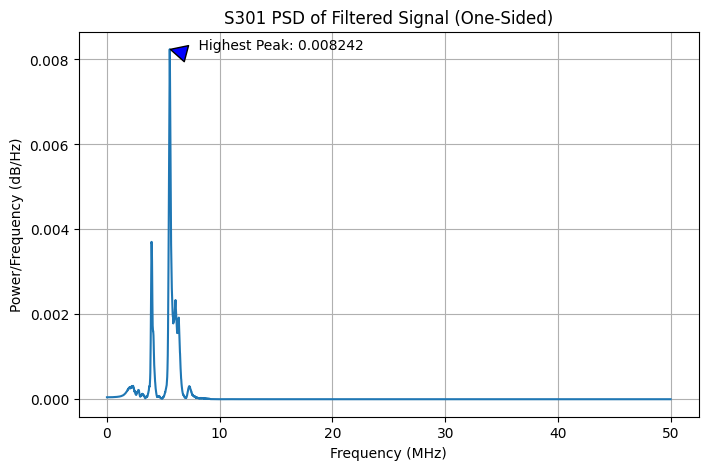

In [114]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd6, psd_one_sided6)
plt.annotate(f'    Highest Peak: {psd_one_sided6[highest_peak]:.6f}', 
             xy=(freq_psd6[highest_peak], 
                 psd_one_sided6[highest_peak]),
             xytext=(freq_psd6[highest_peak]+1, psd_one_sided6[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S301 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### S302

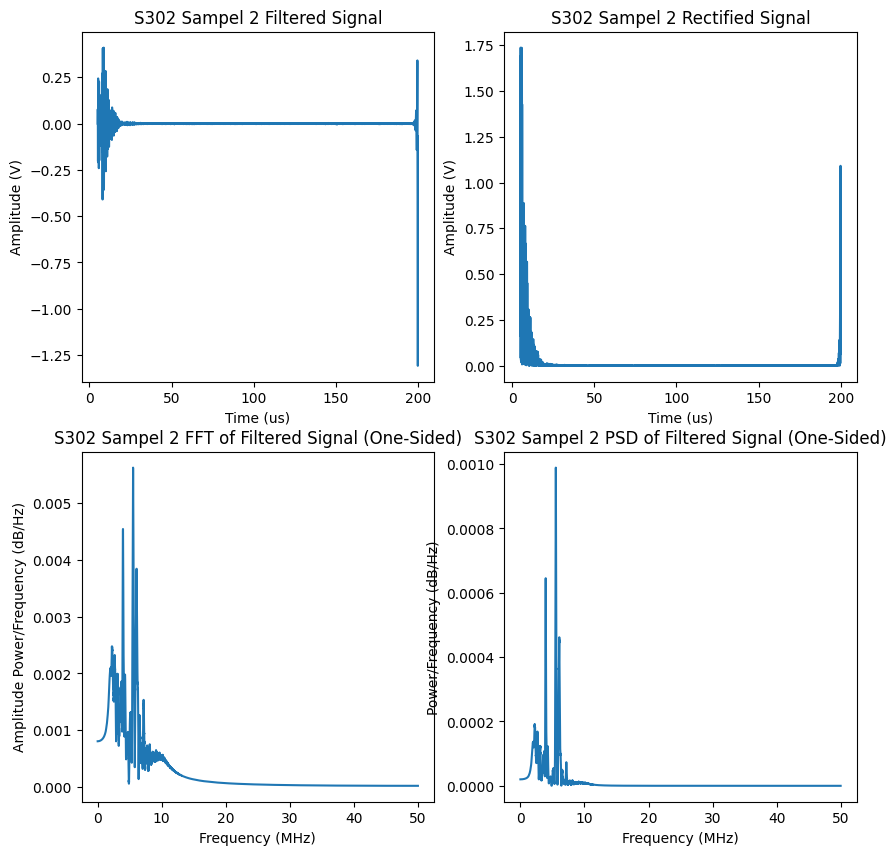

In [115]:
# S302
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x7, filtered_signal7)
axs[0, 0].set_title('S302 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x7, rectified_signal6)
axs[0, 1].set_title('S302 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq7, fft_amp7)
axs[1, 0].set_title('S302 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd7, psd_one_sided7)
axs[1, 1].set_title('S302 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

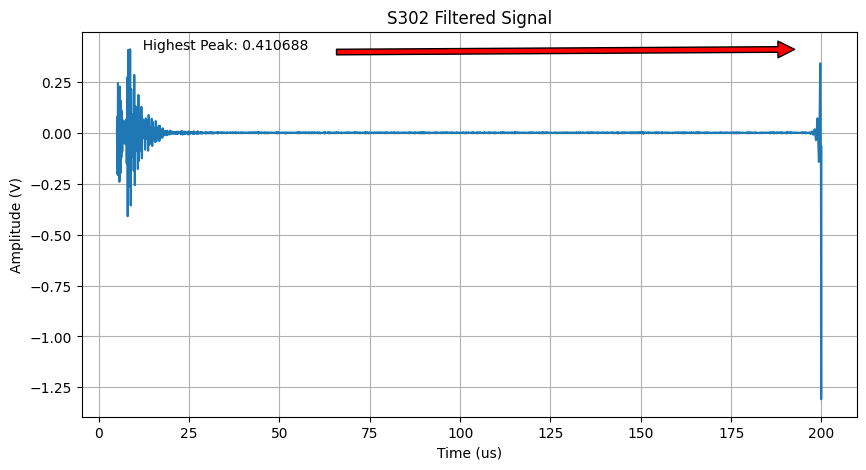

In [116]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x7, filtered_signal7)
plt.annotate(f'  Highest Peak: {filtered_signal7[highest_peak]:.6f}', 
             xy=(x7[highest_peak1], 
                 filtered_signal7[highest_peak]),
             xytext=(x7[highest_peak]+1, filtered_signal7[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S302 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

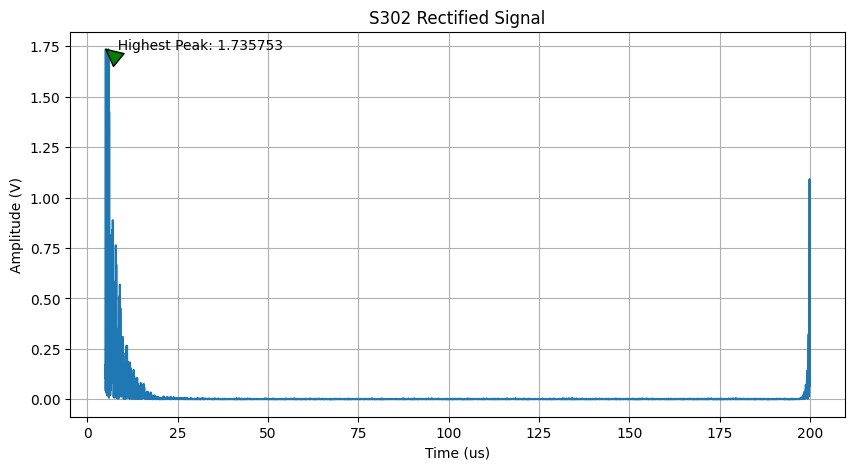

In [117]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal6)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal6[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x7, rectified_signal6)
plt.annotate(f'  Highest Peak: {rectified_signal6[highest_peak]:.6f}', 
             xy=(x7[highest_peak], 
                 rectified_signal6[highest_peak]),
             xytext=(x7[highest_peak]+1, rectified_signal6[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S302 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

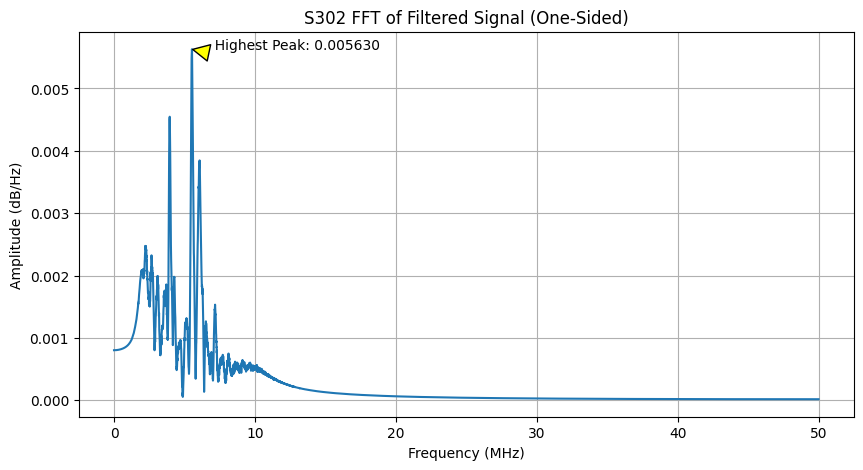

In [118]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq7, fft_amp7)
plt.annotate(f'  Highest Peak: {fft_amp7[highest_peak]:.6f}', 
             xy=(freq7[highest_peak], 
                 fft_amp7[highest_peak]),
             xytext=(freq7[highest_peak]+1, fft_amp7[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S302 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

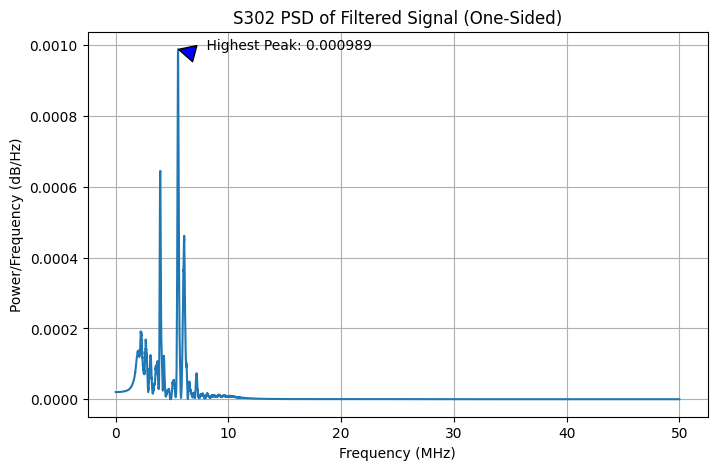

In [119]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided7)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided7[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd7, psd_one_sided7)
plt.annotate(f'    Highest Peak: {psd_one_sided7[highest_peak]:.6f}', 
             xy=(freq_psd7[highest_peak], 
                 psd_one_sided7[highest_peak]),
             xytext=(freq_psd7[highest_peak]+1, psd_one_sided7[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S302 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### S303

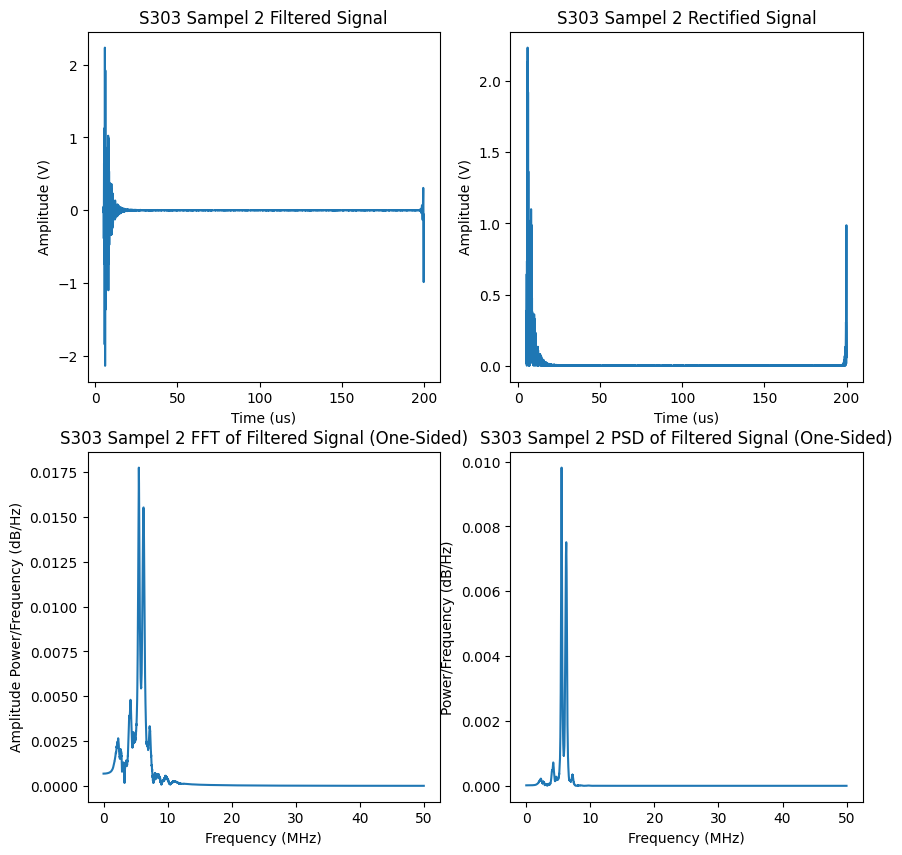

In [120]:
# S303
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x8, filtered_signal8)
axs[0, 0].set_title('S303 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x8, rectified_signal8)
axs[0, 1].set_title('S303 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq8, fft_amp8)
axs[1, 0].set_title('S303 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd8, psd_one_sided8)
axs[1, 1].set_title('S303 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

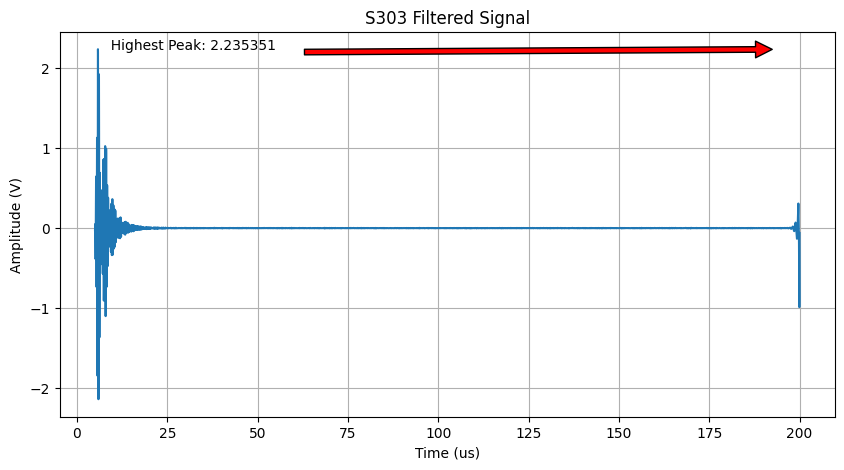

In [121]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x8, filtered_signal8)
plt.annotate(f'  Highest Peak: {filtered_signal8[highest_peak]:.6f}', 
             xy=(x8[highest_peak1], 
                 filtered_signal8[highest_peak]),
             xytext=(x8[highest_peak]+1, filtered_signal8[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S303 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

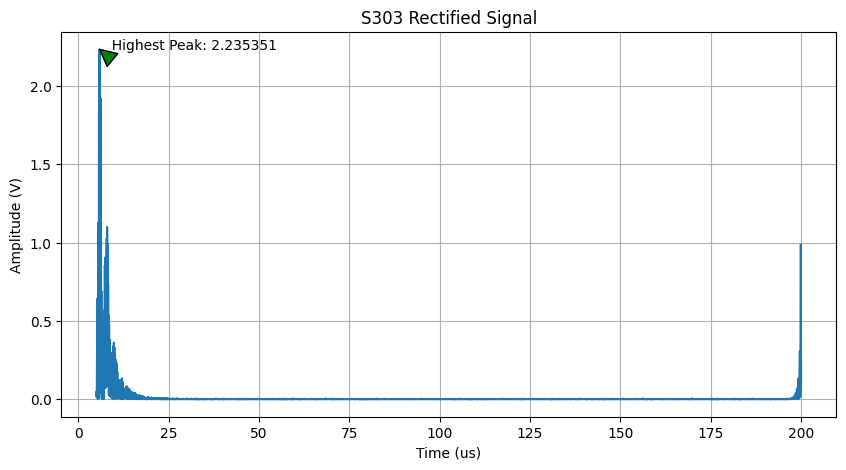

In [122]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x8, rectified_signal8)
plt.annotate(f'  Highest Peak: {rectified_signal8[highest_peak]:.6f}', 
             xy=(x8[highest_peak], 
                 rectified_signal8[highest_peak]),
             xytext=(x8[highest_peak]+1, rectified_signal8[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S303 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

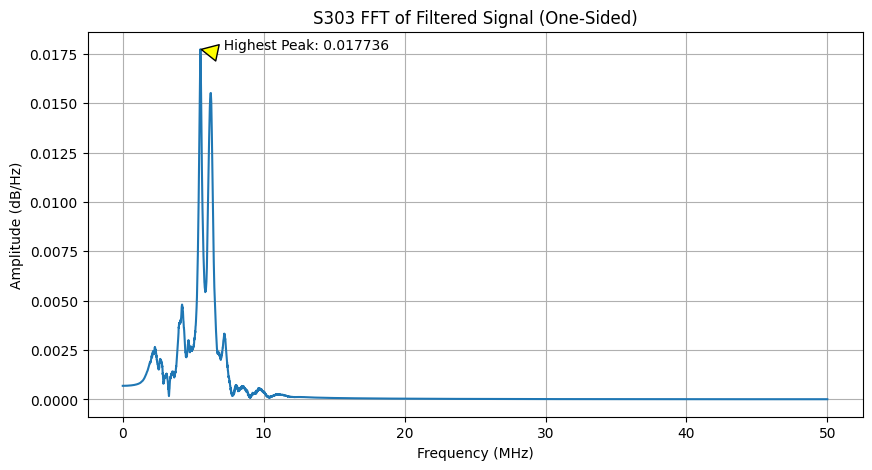

In [123]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq8, fft_amp8)
plt.annotate(f'  Highest Peak: {fft_amp8[highest_peak]:.6f}', 
             xy=(freq8[highest_peak], 
                 fft_amp8[highest_peak]),
             xytext=(freq8[highest_peak]+1, fft_amp8[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S303 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

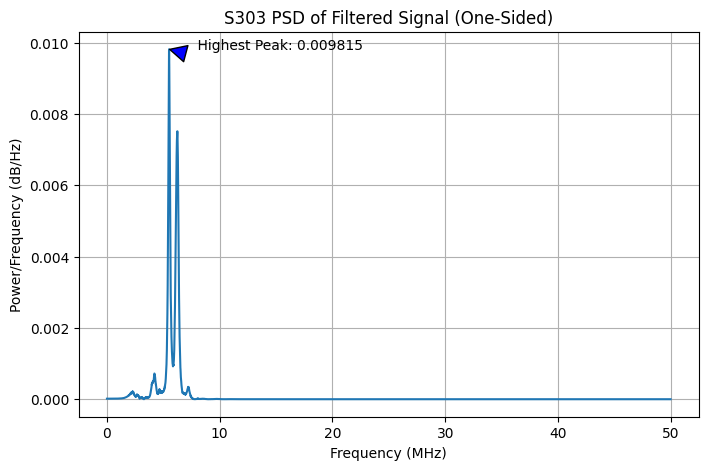

In [124]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided8)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided8[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd8, psd_one_sided8)
plt.annotate(f'    Highest Peak: {psd_one_sided8[highest_peak]:.6f}', 
             xy=(freq_psd8[highest_peak], 
                 psd_one_sided8[highest_peak]),
             xytext=(freq_psd8[highest_peak]+1, psd_one_sided8[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S303 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### S304

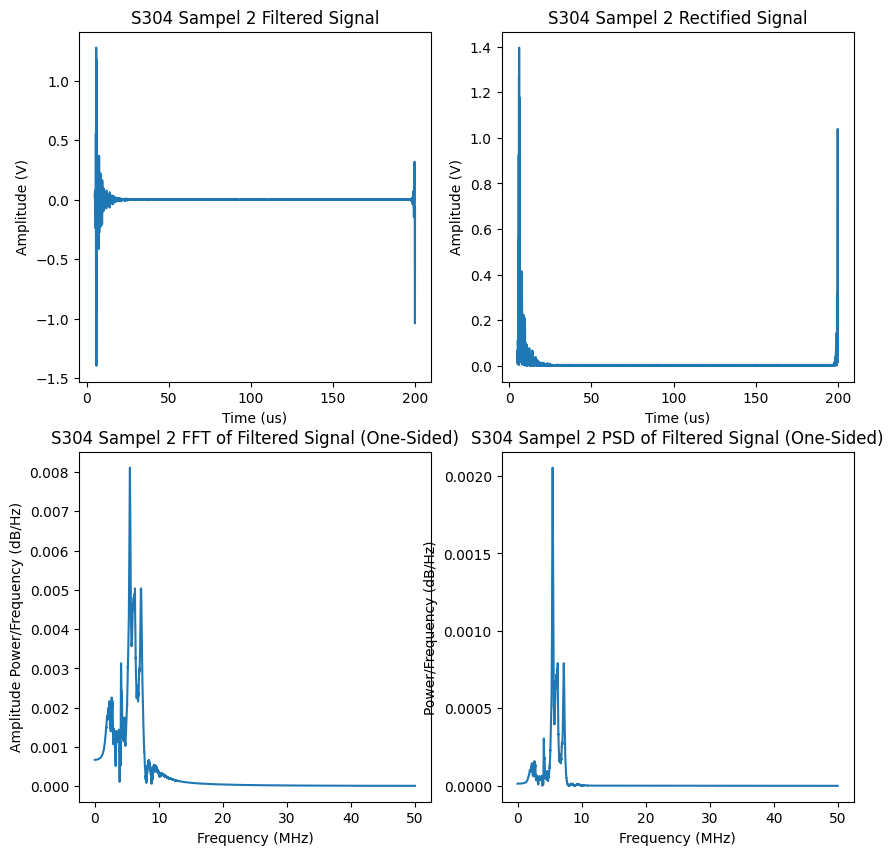

In [125]:
# S304
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x9, filtered_signal9)
axs[0, 0].set_title('S304 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x9, rectified_signal9)
axs[0, 1].set_title('S304 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq9, fft_amp9)
axs[1, 0].set_title('S304 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd9, psd_one_sided9)
axs[1, 1].set_title('S304 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

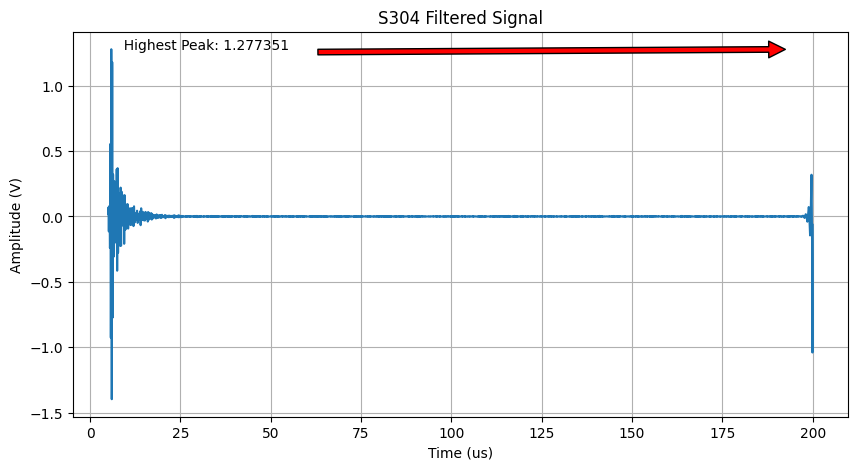

In [126]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x9, filtered_signal9)
plt.annotate(f'  Highest Peak: {filtered_signal9[highest_peak]:.6f}', 
             xy=(x9[highest_peak1], 
                 filtered_signal9[highest_peak]),
             xytext=(x9[highest_peak]+1, filtered_signal9[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S304 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

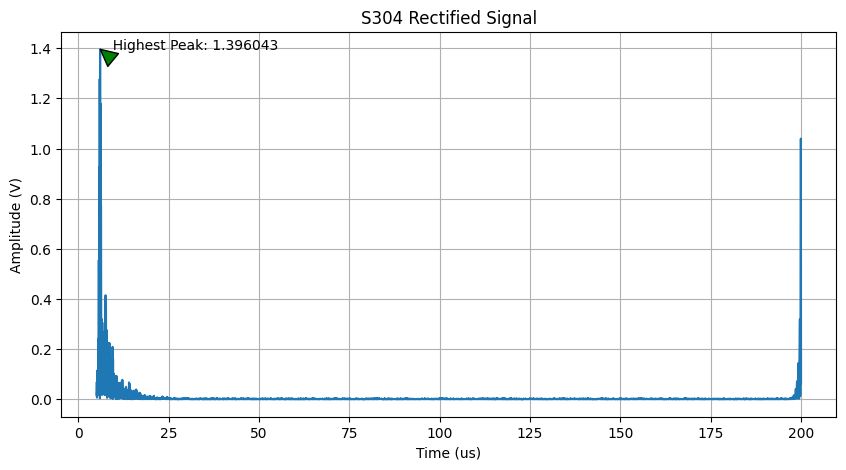

In [127]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x9, rectified_signal9)
plt.annotate(f'  Highest Peak: {rectified_signal9[highest_peak]:.6f}', 
             xy=(x9[highest_peak], 
                 rectified_signal9[highest_peak]),
             xytext=(x9[highest_peak]+1, rectified_signal9[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S304 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

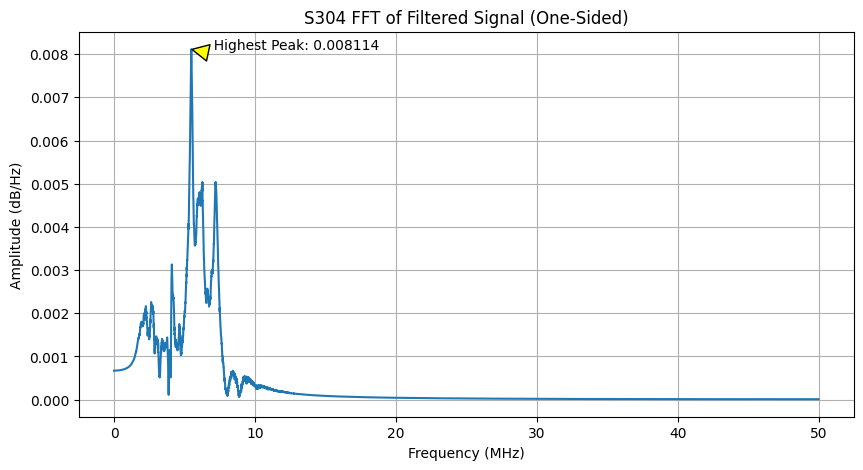

In [128]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq9, fft_amp9)
plt.annotate(f'  Highest Peak: {fft_amp9[highest_peak]:.6f}', 
             xy=(freq9[highest_peak], 
                 fft_amp9[highest_peak]),
             xytext=(freq9[highest_peak]+1, fft_amp9[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S304 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

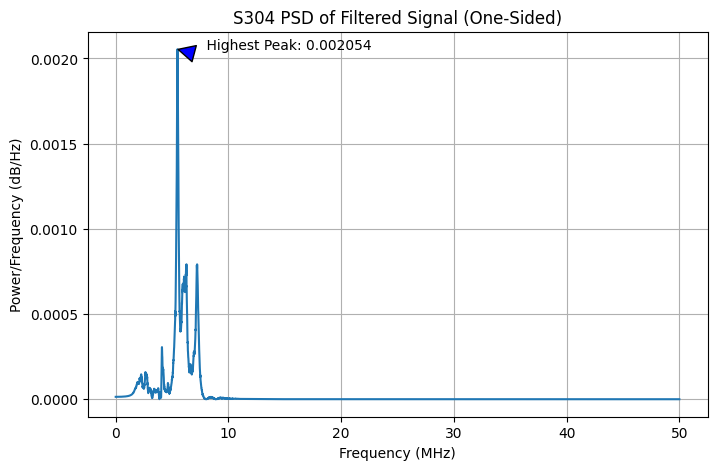

In [129]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided9)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided9[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd9, psd_one_sided9)
plt.annotate(f'    Highest Peak: {psd_one_sided9[highest_peak]:.6f}', 
             xy=(freq_psd9[highest_peak], 
                 psd_one_sided9[highest_peak]),
             xytext=(freq_psd9[highest_peak]+1, psd_one_sided9[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S304 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### S305

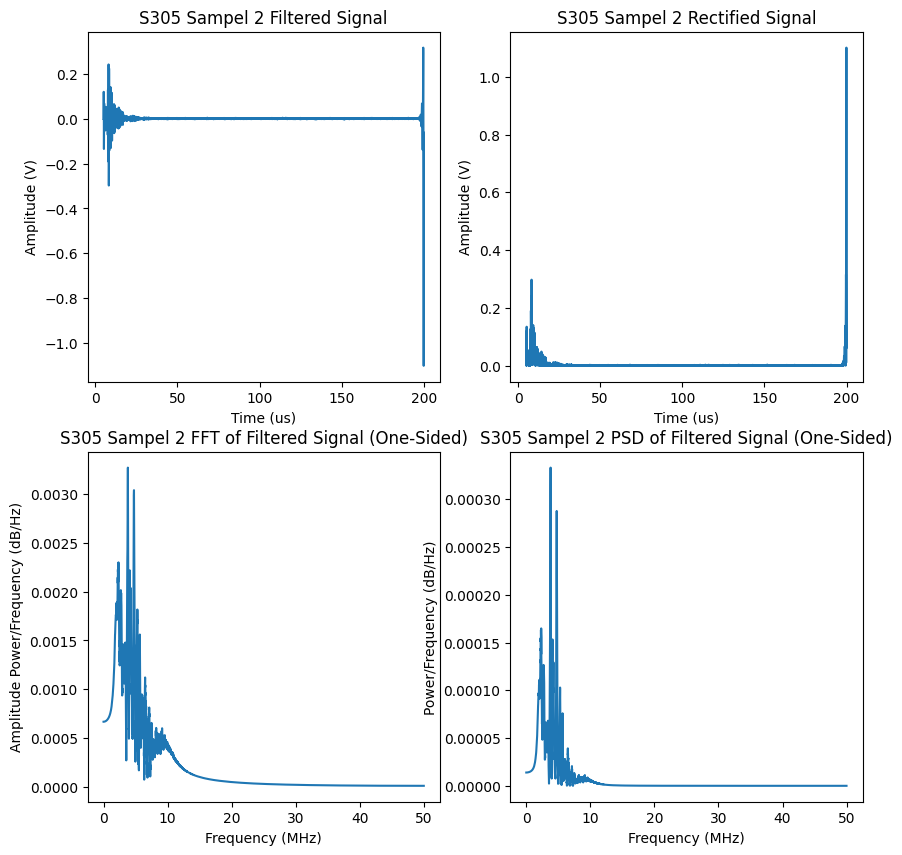

In [130]:
# S305
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x10, filtered_signal10)
axs[0, 0].set_title('S305 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x10, rectified_signal10)
axs[0, 1].set_title('S305 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq10, fft_amp10)
axs[1, 0].set_title('S305 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd10, psd_one_sided10)
axs[1, 1].set_title('S305 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

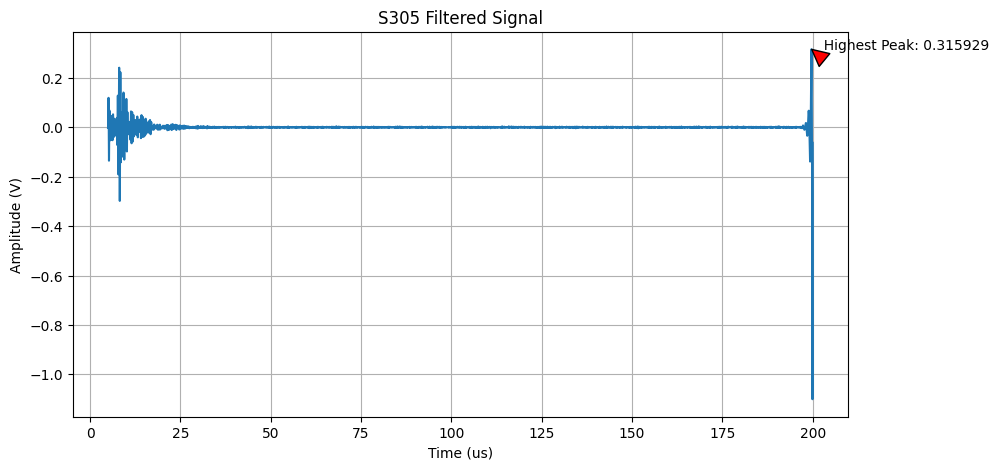

In [131]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x10, filtered_signal10)
plt.annotate(f'  Highest Peak: {filtered_signal10[highest_peak]:.6f}', 
             xy=(x10[highest_peak1], 
                 filtered_signal10[highest_peak]),
             xytext=(x10[highest_peak]+1, filtered_signal10[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('S305 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

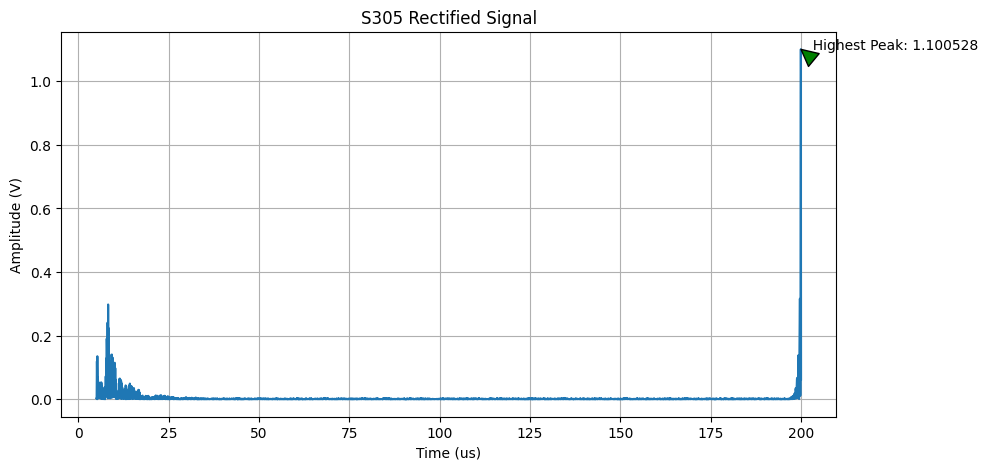

In [132]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x10, rectified_signal10)
plt.annotate(f'  Highest Peak: {rectified_signal10[highest_peak]:.6f}', 
             xy=(x10[highest_peak], 
                 rectified_signal10[highest_peak]),
             xytext=(x10[highest_peak]+1, rectified_signal10[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('S305 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

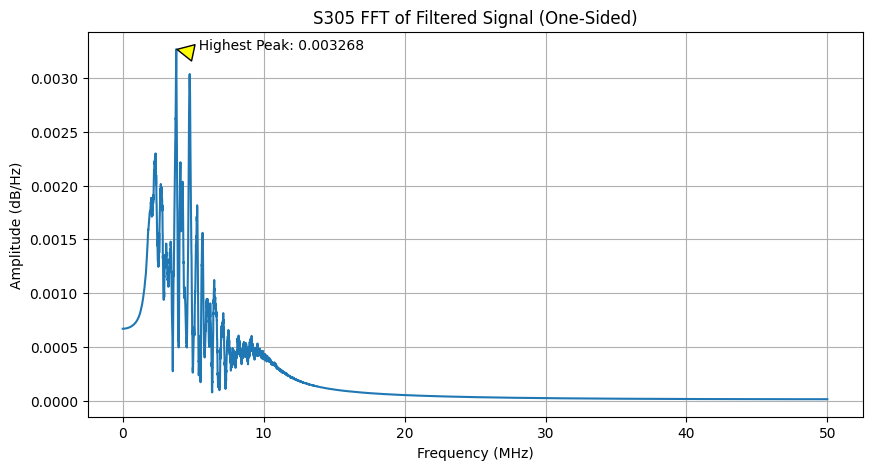

In [133]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq10, fft_amp10)
plt.annotate(f'  Highest Peak: {fft_amp10[highest_peak]:.6f}', 
             xy=(freq10[highest_peak], 
                 fft_amp10[highest_peak]),
             xytext=(freq10[highest_peak]+1, fft_amp10[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('S305 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

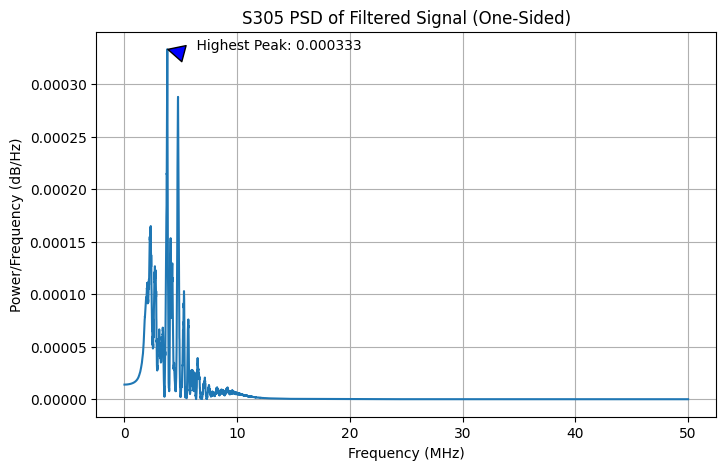

In [134]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided10)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided10[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd10, psd_one_sided10)
plt.annotate(f'    Highest Peak: {psd_one_sided10[highest_peak]:.6f}', 
             xy=(freq_psd10[highest_peak], 
                 psd_one_sided10[highest_peak]),
             xytext=(freq_psd10[highest_peak]+1, psd_one_sided10[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('S305 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

## Sisi Kecil

### K301

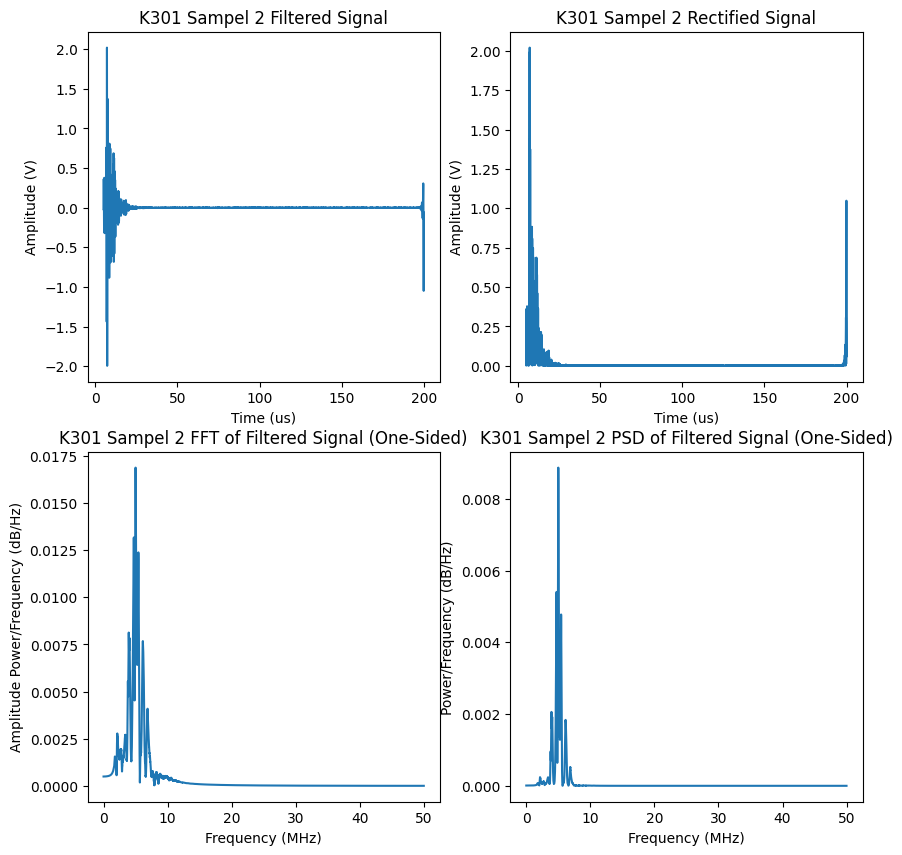

In [135]:
# K301
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x11, filtered_signal11)
axs[0, 0].set_title('K301 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x11, rectified_signal11)
axs[0, 1].set_title('K301 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq11, fft_amp11)
axs[1, 0].set_title('K301 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd11, psd_one_sided11)
axs[1, 1].set_title('K301 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

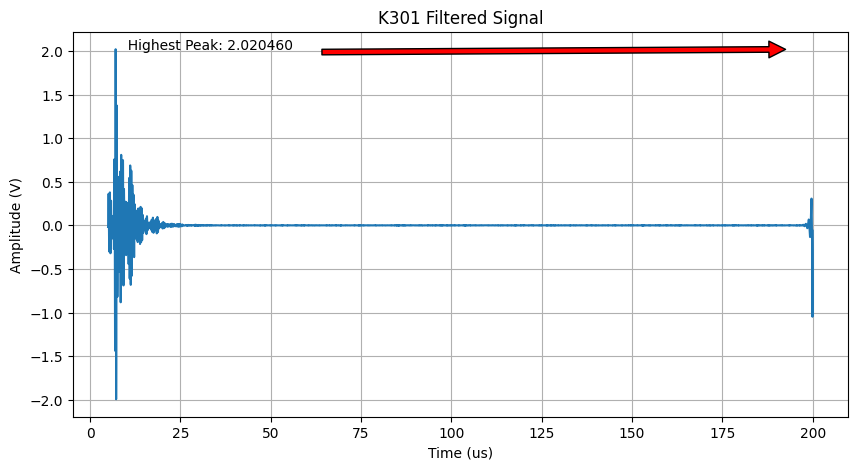

In [136]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x11, filtered_signal11)
plt.annotate(f'  Highest Peak: {filtered_signal11[highest_peak]:.6f}', 
             xy=(x11[highest_peak1], 
                 filtered_signal11[highest_peak]),
             xytext=(x11[highest_peak]+1, filtered_signal11[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('K301 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

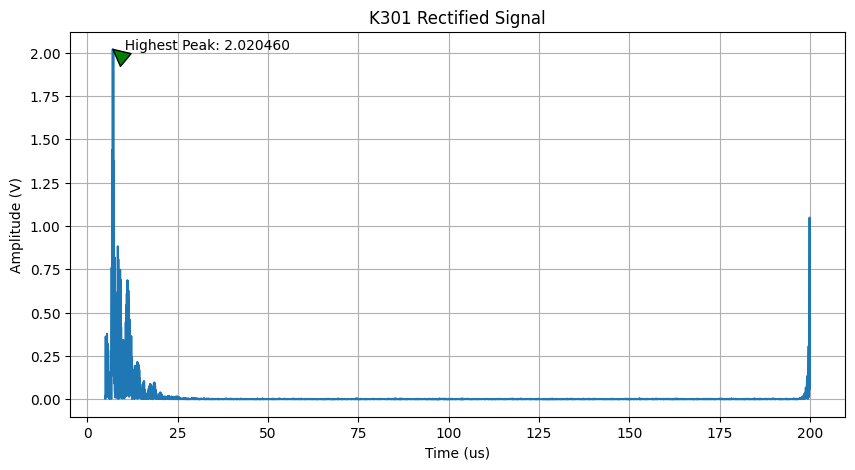

In [137]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x11, rectified_signal11)
plt.annotate(f'  Highest Peak: {rectified_signal11[highest_peak]:.6f}', 
             xy=(x11[highest_peak], 
                 rectified_signal11[highest_peak]),
             xytext=(x11[highest_peak]+1, rectified_signal11[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('K301 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

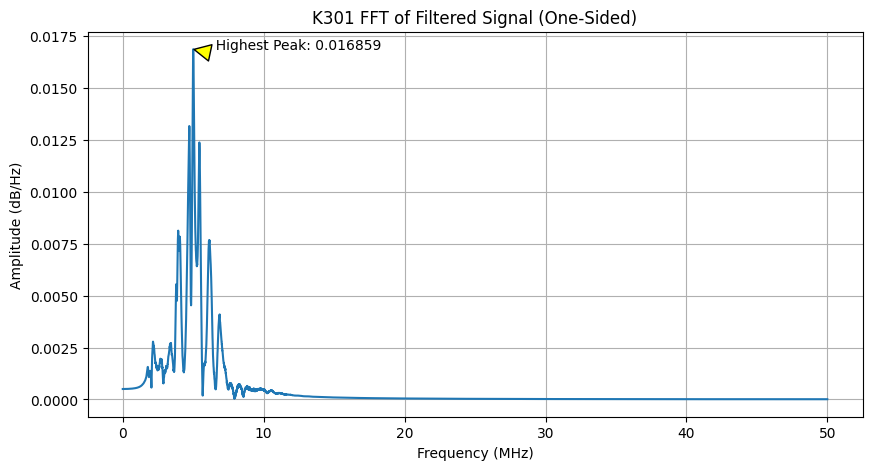

In [138]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq11, fft_amp11)
plt.annotate(f'  Highest Peak: {fft_amp11[highest_peak]:.6f}', 
             xy=(freq11[highest_peak], 
                 fft_amp11[highest_peak]),
             xytext=(freq11[highest_peak]+1, fft_amp11[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('K301 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

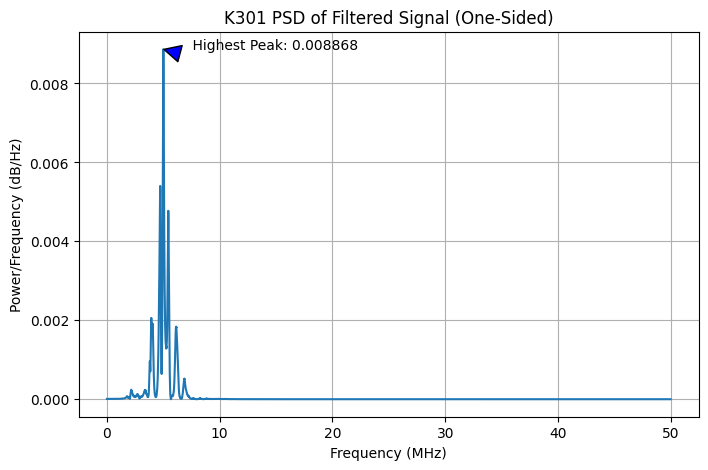

In [139]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided11)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided11[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd11, psd_one_sided11)
plt.annotate(f'    Highest Peak: {psd_one_sided11[highest_peak]:.6f}', 
             xy=(freq_psd11[highest_peak], 
                 psd_one_sided11[highest_peak]),
             xytext=(freq_psd11[highest_peak]+1, psd_one_sided11[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('K301 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')

### K302

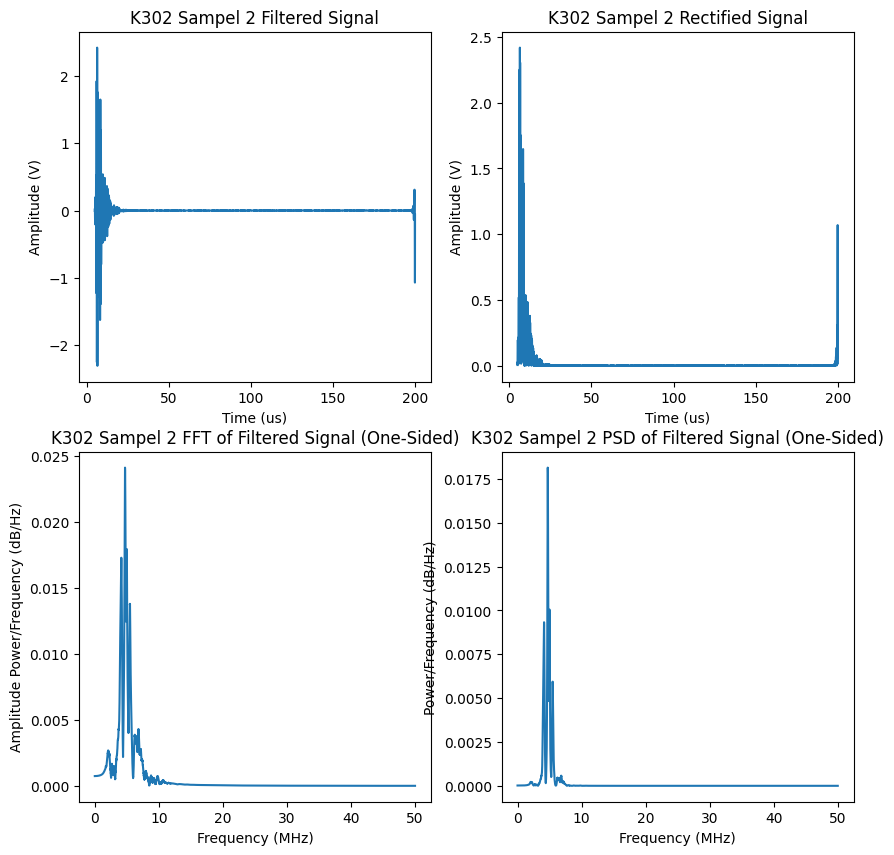

In [140]:
# K302
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(x12, filtered_signal12)
axs[0, 0].set_title('K302 Sampel 2 Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(x12, rectified_signal12)
axs[0, 1].set_title('K302 Sampel 2 Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq12, fft_amp12)
axs[1, 0].set_title('K302 Sampel 2 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd12, psd_one_sided12)
axs[1, 1].set_title('K302 Sampel 2 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

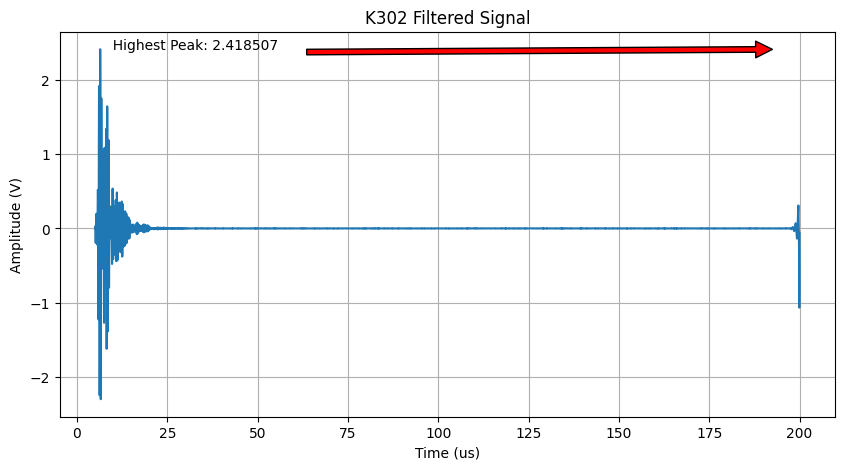

In [141]:
plt.figure(figsize=(10,5))

peaks, _ = find_peaks(filtered_signal12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[filtered_signal12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x12, filtered_signal12)
plt.annotate(f'  Highest Peak: {filtered_signal12[highest_peak]:.6f}', 
             xy=(x12[highest_peak1], 
                 filtered_signal12[highest_peak]),
             xytext=(x12[highest_peak]+1, filtered_signal12[highest_peak]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('K302 Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

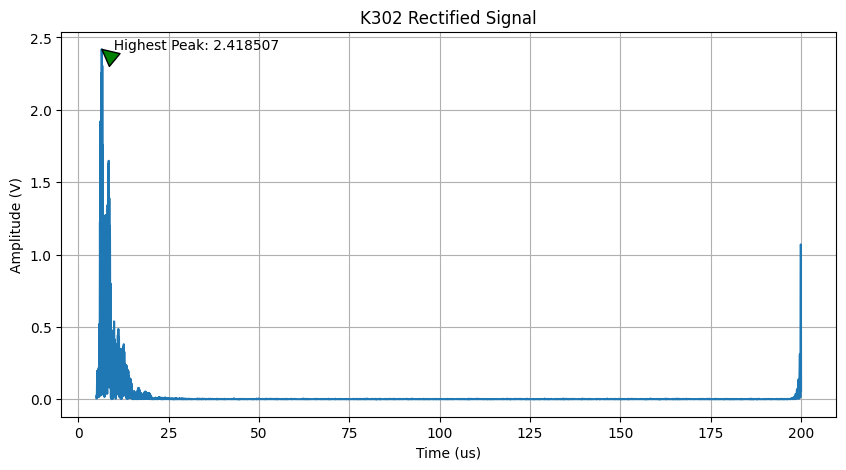

In [142]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[rectified_signal12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(x12, rectified_signal12)
plt.annotate(f'  Highest Peak: {rectified_signal12[highest_peak]:.6f}', 
             xy=(x12[highest_peak], 
                 rectified_signal12[highest_peak]),
             xytext=(x12[highest_peak]+1, rectified_signal12[highest_peak]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('K302 Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

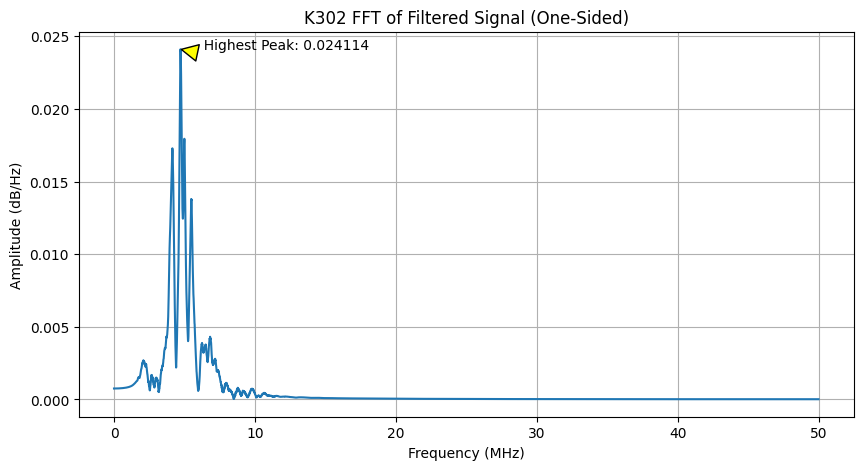

In [144]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[fft_amp12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq12, fft_amp12)
plt.annotate(f'  Highest Peak: {fft_amp12[highest_peak]:.6f}', 
             xy=(freq12[highest_peak], 
                 fft_amp12[highest_peak]),
             xytext=(freq12[highest_peak]+1, fft_amp12[highest_peak]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.title('K302 FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

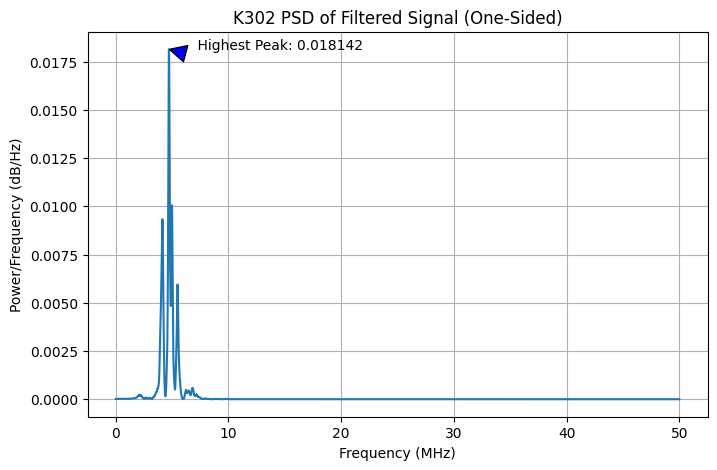

In [143]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided12)  # mencari puncak-puncak dalam sinyal
highest_peak = peaks[psd_one_sided12[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd12, psd_one_sided12)
plt.annotate(f'    Highest Peak: {psd_one_sided12[highest_peak]:.6f}', 
             xy=(freq_psd12[highest_peak], 
                 psd_one_sided12[highest_peak]),
             xytext=(freq_psd12[highest_peak]+1, psd_one_sided12[highest_peak]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('K302 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')